In [1]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import common_utils,my_ensembler, feature_utils, defines, model_utils, my_bert
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
from operator import itemgetter
from sklearn_crfsuite.utils import flatten
from sklearn_crfsuite.metrics import sequence_accuracy_score
from sklearn.linear_model import LogisticRegression
import scipy
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
import classes
import pickle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import doc_utils_clean as doc_utils
import pos_yap_process

In [2]:
dir_name='duplicate'
seq_len=15
step=15
cv_split_name='cv_splits_10_no_71'
# merged_str='scaled.binary0.50_merged'
merged_str='scaled.per_doc0.5'
dataset_name='dataset.new.30.no.71'
doc_indices=np.arange(1,81)
doc_indices
test_doc_num=8
seed=42

### Dataset without 76 document

In [ ]:
# imp.reload(classes)
# imp.reload(feature_utils)
# dataset=classes.Dataset(dir_name=dir_name,doc_indices=doc_indices,merged_str=merged_str)
# dataset.set_tf_params('lemma')
# dataset.set_tf_params('word')
# dataset.set_tf_params('char_wb')
# dataset.pack_dataset()
# dataset.pack_sent_per_paragraph()
# dataset.reshape(seq_len,step)
# dataset.dump_to_file("new.76")

### Load dataset

In [40]:
dataset=pickle.load( open( os.path.join(os.getcwd(),
                defines.PATH_TO_DFS,
                dir_name,
                dataset_name+
                ".p"),
                 "rb"))

In [46]:
dataset.doc_map[30].sent_list[0].text

' XXX  ממש'

In [ ]:
vars(dataset.tf_params['lemma'])

### Parse new doc - index 30

In [24]:
doc_idx=30
doc_utils.doc_db=common_utils.load_db(dir_name,'doc_db')
doc_utils.debug_db = pd.DataFrame()
doc_utils.parse_doc(dir_name,int(doc_idx),merge_short_sent=True,single=True)
# dic_utils.debug_db = pd.DataFrame()
# doc_utils.parse_doc(dir_name,int(doc_idx),merge_short_sent=True)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/doc_db.csv,  index False
682 sentences 

In [25]:
doc_utils.doc_db.iloc[29:31]

,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count,client,session
29,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,30_lametbet5_Dana.docx,30.000000,342.000000,682.000000,130.000000,lametbet,5
30,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,31_kafHey15_Dana.docx,31.000000,79.000000,441.000000,178.000000,kafhey,15


In [26]:
ft = feature_utils.load_fasstex_model()

In [31]:
imp.reload(pos_yap_process)
yap_proc = pos_yap_process.start_yap_api()
yap_proc

In [33]:
imp.reload(pos_yap_process)
yap_response = pos_yap_process.try_yap()
yap_response

{'ma_lattice': '0\t1\tגנן\tגינן\tVB\tVB\tgen=M|num=S|per=2|tense=IMPERATIVE\t1\n0\t1\tגנן\tגן\tNN\tNN\tgen=M|num=S|suf_gen=F|suf_num=P|suf_per=3\t1\n0\t1\tגנן\tגנן\tNN\tNN\tgen=M|num=S\t1\n0\t1\tגנן\tגנן\tNNT\tNNT\tgen=M|num=S\t1\n0\t1\tגנן\tגינן\tVB\tVB\tgen=M|num=S|per=3|tense=PAST\t1\n1\t2\tגידל\tגידל\tVB\tVB\tgen=M|num=S|per=3|tense=PAST\t2\n2\t3\tדג\tדג\tBN\tBN\tgen=M|num=S|per=A\t3\n2\t5\tדגן\tדגן\tNNP\tNNP\tgen=M|num=S\t3\n2\t5\tדגן\tדג\tNN\tNN\tgen=M|num=S|suf_gen=F|suf_num=P|suf_per=3\t3\n2\t5\tדגן\tדגן\tNN\tNN\tgen=M|num=S\t3\n2\t5\tדגן\tדגן\tNNT\tNNT\tgen=M|num=S\t3\n3\t4\tאת\tאת\tPOS\tPOS\t_\t3\n4\t5\tהן\tהן\tS_PRN\tS_PRN\tgen=F|num=P|per=3\t3\n5\t6\tב\tב\tPREPOSITION\tPREPOSITION\t_\t4\n5\t8\tבגן\tבגן\tNNP\tNNP\tgen=M|num=S\t4\n5\t8\tבגן\tבגן\tNN\tNN\tgen=M|num=P|num=S\t4\n5\t8\tבגן\tבגן\tNN\tNN\tgen=M|num=S\t4\n5\t8\tבגן\tבגן\tNNP\tNNP\tgen=F|num=S\t4\n5\t8\tבגן\tבגן\tNNP\tNNP\tgen=F|gen=M|num=S\t4\n5\t8\tבגן\tבגן\tNNP\tNNP\t_\t4\n5\t8\tבגן\tבגן\tNN\tNN\tgen=M|num=P\t4\n5

In [34]:
imp.reload(pos_yap_process)
pos_yap_process.parse_all_sentenses(['dataframes/duplicate/30_sent_db.csv'])
feature_utils.save_doc_features(dir_name,int(doc_idx),ft)

Started doc 0 of 1
0 got response
100 got response
200 got response
300 got response
400 got response
500 got response
600 got response
Saved db 30_sent_pos_db.csv
30 sent lemma db saved
30 sent count db saved
30 sent features db saved
30 doc sent saved
30 sim_db sent saved


### Replace doc 30 in database, remove doc 71

In [39]:
# doc = classes.Document(idx=doc_idx,
#                        path=dataset.path,
#                        tf_params=dataset.tf_params,
#                        merged_str=dataset.merged_str,
#                        neighbor_radius=dataset.neighbor_radius)
# doc.pack_doc()
# print("{}".format(doc_idx, end=' '))
dataset.doc_map[doc_idx] = doc

In [41]:
dataset.create_tfidf()

TfIdf lemma vocab size 3215
Sample of 3215 features
['CBT', 'XXX', 'be', 'fake', 'he', 'ill', 'make', 'mean', 'of', 'over', 'you', 'אאוט', 'אאוטסיידר', 'אב', 'אבא', 'אבחון', 'אבחן', 'אבטח', 'אביב', 'אבל']
['לגבי', 'לגיטימי', 'לגיטימציה', 'לגמרי', 'להיום', 'להיפך', 'להקה', 'לוואי', 'לוז', 'לום', 'לומד', 'לזה', 'לח', 'לחוץ', 'לחיץ', 'לחיצה', 'לחלוטין', 'לחם', 'לחץ', 'ליבן']
['CBT', 'בזמנו', 'הוכח', 'התחייב', 'חשד', 'לח', 'מעקב', 'סדר', 'פסיכולוגיה', 'שאמרת']
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 TdIdf lemma built
TfIdf word vocab size 5529
Sample of 5529 features
['123', 'CBT', 'XXX', 'be', 'fake', 'he', 'ill', 'make', 'mean', 'of', 'you', 'אאוט', 'אאוטסיידר', 'אבא', 'אבדוק', 'אבוא', 'אבחון', 'אביא', 'אביב', 'אבין']
['לגן', 'לגעת', 'לגרום', 'לגשר', 'לגשת', 'לדאוג', 'לדבר', 'לדברים', 'לדוגמא', 'לדוגמה', 'לדחוף', 'לדחות', 'לדייט', 'לדייטים', 'לדירה', 'לדמיין', 'לדעת', 'לדעתי', 'לדעתך', 'לדרוש']
['123', 'בינתיים', 'הגבול', 'הקליפ', 'חודשיים', 'לדחות', 'מבואס', 'מקרין', 'עליך', 'שהן']
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 TdIdf word built
TfIdf char_wb vocab size 33038
Sample of 33038 features
[' 12', ' 123', ' 123 ', ' CB', ' CBT', ' CBT ', ' X ', ' XX', ' XXX', ' XXX ', ' be', ' be ', ' fa', ' fak', ' fake', ' he', ' he ', ' i ', ' il', ' ill']
['ופט ', 'ופטי', 'ופטים', 'ופטימ', 'ופי', 'ופי ', 'ופיה', 'ופיה ', 'ופיי', 'ופיל', 'ופיל ', 'ופים', 'ופים ', 'ופיע', 'ופיעה', 'ופית', 'ופית ', 'ופך', 'ופך ', 'ופכ']
[' 12', ' ותמי', ' עזו', 'בדיד', 'הימי', 'ופים', 'יסר', 'מגלה ', 'סכמ', 'ריעו']
0 1 2 3 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 TdIdf char_wb built


In [43]:
dataset.doc_map[doc_idx].pack_sent_per_paragraph()
dataset.doc_map[doc_idx].reshape_doc(seq_len,step)

Doc 30 reshaped from 395 to 27


In [53]:
dataset.doc_map.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [65]:
vars(dataset.doc_map[30].sent_list[13])

{'doc_idx': 30,
 'sent_idx': 13,
 'doc_len': 395,
 'par_idx': 3,
 'x': {'is_question': 0.5,
  'par_pos_in_doc': 0.048780487804878,
  'sent_len': 0.0078313253012048,
  'is_client': 0.0,
  'sent_pos_in_par': 1.0,
  'sent_pos_in_doc': 0.0354430379746835,
  'TOKEN': 0.0121212121212121,
  'POSTAG_BN': 0.3333333333333333,
  'POSTAG_PRP': 0.3333333333333333,
  'POSTAG_QW': 0.3333333333333333,
  'f_gen_M': 0.6666666666666666,
  'f_num_S': 0.6666666666666666,
  'f_per_3': 0.3333333333333333,
  'f_per_A': 0.3333333333333333,
  '-1:is_question': 0.0,
  '-1:par_pos_in_doc': 0.0365853658536585,
  '-1:sent_len': 0.0054216867469879,
  '-1:is_client': 0.5,
  '-1:sent_pos_in_par': 1.0,
  '-1:sent_pos_in_doc': 0.0329113924050632,
  '-1:POSTAG_NN': 1.0,
  '-1:POSTAG_NNP': 1.0,
  '-1:f_gen_M': 2.0,
  '-1:f_num_S': 2.0,
  '+1:is_question': 0.0,
  '+1:par_pos_in_doc': 0.0609756097560975,
  '+1:sent_len': 0.1331325301204819,
  '+1:is_client': 0.5,
  '+1:sent_pos_in_par': 0.25,
  '+1:sent_pos_in_doc': 0.03797

### Use new scaled features

In [47]:
dataset.merged_str=merged_str

In [48]:
dataset.merged_str

'scaled.per_doc0.5'

In [49]:
for k,v in dataset.doc_map.items():
    v.merged_str=merged_str

In [64]:
dataset.path='/scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate'
dataset.dir_name='duplicate'

In [65]:
dataset.set_tf_params('lemma')
dataset.set_tf_params('word')
dataset.set_tf_params('char_wb')
dataset.pack_dataset()
dataset.pack_sent_per_paragraph()
dataset.reshape(seq_len,step)

TfIdf lemma vocab size 3199
Sample of 3199 features
['CBT', 'TRX', 'XXX', 'be', 'fake', 'he', 'ill', 'make', 'mean', 'of', 'over', 'you', 'אאוט', 'אאוטסיידר', 'אב', 'אבא', 'אבחון', 'אבחן', 'אבטח', 'אביב']
['לגיטימי', 'לגיטימציה', 'לגמרי', 'להיום', 'להיפך', 'להקה', 'לוואי', 'לוז', 'לום', 'לומד', 'לזה', 'לח', 'לחוץ', 'לחיץ', 'לחיצה', 'לחלוטין', 'לחם', 'לחץ', 'ליבן', 'ליד']
['CBT', 'בזבז', 'הוטרף', 'התווכח', 'חרת', 'לזה', 'מעניין', 'סדר', 'פסיכיאטר', 'שאם']
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 TdIdf lemma built
TfIdf word vocab size 5471
Sample of 5471 features
['123', 'CBT', 'XXX', 'be', 'fake', 'he', 'ill', 'make', 'mean', 'of', 'you', 'אאוט', 'אאוטסיידר', 'אבא', 'אבדוק', 'אבוא', 'אבחון', 'אביא', 'אביב', 'אבין']
['לדירה', 'לדמיין', 'לדעת', 'לדעתי', 'לדעתך', 'לדרוש', 'לדרך', 'לה', 'להאחז', 'להאמין', 'להאשים', 'להביא', 'להבין', 'להביע', 'להגדיר', 'להגיב', 'להגיד', 'להגיע', 'להגשים', 'להדגים']
['123', 'בינתיים', 'הגדולה', 'הקרובים', 'חולם', 'להאמין', 'מבחוץ', 'מראש', 'עלתה', 'שהמקום', 'תתרחק']
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 TdIdf word built
TfIdf char_wb vocab size 32871
Sample of 32871 features
[' 12', ' 123', ' 123 ', ' CB', ' CBT', ' CBT ', ' X ', ' XX', ' XXX', ' XXX ', ' be', ' be ', ' fa', ' fak', ' fake', ' he', ' he ', ' i ', ' il', ' ill']
['ופך', 'ופך ', 'ופכ', 'ופכי', 'ופכים', 'ופכת', 'ופכת ', 'ופל', 'ופל ', 'ופלו', 'ופלות', 'ופלי', 'ופלים', 'ופלת', 'ופלת ', 'ופן', 'ופן ', 'ופנ', 'ופנו', 'ופנוע']
[' 12', ' זאתי', ' עזבי', 'בדיי', 'היפ', 'ופלו', 'יעדי', 'מגע ', 'סכל ', 'רימה ', '״ר ']
0 1 2 3 

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 TdIdf char_wb built

Packing dataset...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
72
73
74
75
76
77
78
79
80

Reshaping dataset: seq_len 15, step 15...
Doc 1 reshaped from 613 to 41
1
Doc 2 reshaped from 652 to 44
2
Doc 3 reshaped from 682 to 46
3
Doc 4 reshaped from 471 to 32
4
Doc 5 reshaped from 513 to 35
5
Doc 6 reshaped from 810 to 54
6
Doc 7 reshaped from 466 to 32
7
Doc 8 reshaped from 399 to 27
8
Doc 9 reshaped from 588 to 40
9
Doc 10 reshaped from 406 to 28
10
Doc 11 reshaped from 737 to 50
11
Doc 12 reshaped from 741 to 50
12
Doc 13 reshaped from 750 to 50
13
Doc 14 reshaped from 668 to 45
14
Doc 15 resha

In [56]:
for k,v in dataset.doc_map.items():
    v.path=dataset.path

In [59]:
dataset.doc_indices=list(dataset.doc_map.keys())

In [66]:
dataset.doc_map[30].sent_list[0].text

'אה יש קפיטריה למטה בבנין שליד'

In [67]:
common_utils.dump_to_file(dataset,dir_name,'dataset.new.30.no.71')

### Load splits of documents as were used for BERT

In [55]:
cv_splits_loaded=common_utils.load_json(dir_name,cv_split_name)
cv_splits_loaded

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/cv_splits_10.json


{'0': {'test': [4, 14, 15, 18, 29, 32, 36, 70],
  'train': [1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   16,
   17,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   30,
   31,
   33,
   34,
   35,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80]},
 '1': {'test': [5, 6, 13, 34, 37, 62, 73, 80],
  'train': [1,
   2,
   3,
   4,
   7,
   8,
   9,
   10,
   11,
   12,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   35,
   36,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   6

### Remove 71 from splits

In [59]:
for k,v in cv_splits_loaded.items():
    if 71 in v['test']:
        print(1)
#         v['test'].remove(71)
    if 71 in v['train']:
        print(1)
#         v['train'].remove(71)

In [62]:
common_utils.save_json(cv_splits_loaded,dir_name,cv_split_name,False)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/cv_splits_10_no_71.json


### Run demo cross-validation on CRF using 2 splits of 2x document per each

In [ ]:
tmp_split={'0':{'test':[1],'train':[2]}, '1': {'test':[3],'train':[4]}, '2':{'test':[5],'train':[6]}}

In [ ]:
imp.reload(model_utils)
demo_crf_pred, demo_features =model_utils.prepared_cross_validate_crf(dataset, tmp_split, seq_len=seq_len, step=step)

In [ ]:
demo_crf_pred

In [ ]:
demo_features

In [ ]:
imp.reload(model_utils)
crf_scores, crf_dict, par_crf_scores, par_crf_dict = model_utils.get_report_from_splits(demo_crf_pred,"crf")

In [ ]:
np.mean(crf_scores),np.mean(par_crf_scores)

### Add retriving strong features from CRF

In [113]:
imp.reload(model_utils)
my_crf = model_utils.CrfClassifier(crf_model=CRF(
                max_iterations=100,
                all_possible_transitions=True))

CrfClassifier>>>>>>init() called


In [114]:
my_crf.fit(dataset.get_x([1,2],'15_15'),dataset.get_y([1,2],'15_15'))

CrfClassifier(crf_model=CRF(all_possible_transitions=True, max_iterations=100),
              scorer=make_scorer(flat_f1_score, average=weighted, labels=['not_nar', 'is_nar']))

In [115]:
my_crf.predict(dataset.get_y([3,4],'15_15'))

CrfClassifier>>>>>>>predict() called


['is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',

In [116]:
my_crf.crf_model.state_features_
dataset.tf_params['lemma'].features

array(['CBT', 'XXX', 'be', ..., 'תשלום', 'תשע', 'תת'], dtype=object)

In [118]:
my_crf.crf_model.transition_features_


{('not_nar', 'not_nar'): 1.348507,
 ('not_nar', 'is_nar'): -1.538876,
 ('is_nar', 'not_nar'): -1.696405,
 ('is_nar', 'is_nar'): 1.886774}

In [ ]:
dataset.tf_params

In [ ]:
imp.reload(model_utils)
ft = model_utils.get_estimator_features(my_crf.crf_model,**dataset.tf_params)
ft

In [ ]:
len(dataset.tf_params['lemma'].features)

In [ ]:
ft.query('attr.str.contains("lemma")')

In [ ]:
dataset.__class__.__name__

In [ ]:
dataset.doc_map[1].sent_list[0].text

### Run cross-validation on 80 files

In [69]:
imp.reload(common_utils)
crf_best_params=common_utils.load_pickle("","crf.rs.params.793")
crf_best_params

{'min_freq': 5, 'c2': 0.0071, 'c1': 0.459, 'algorithm': 'lbfgs'}

In [67]:
# dataset=pickle.load( open( os.path.join(os.getcwd(),
#                 defines.PATH_TO_DFS,
#                 dir_name,
#                 "dataset_new.76"+
#                 ".p"),
#                  "rb"))

In [106]:
dataset

In [110]:
crf_res_db, crf_state_f_db, crf_trans_f_db =model_utils.prepared_cross_validate_crf(dataset, {0:{'test':[1], 'train':[2]},1:{'test':[3],'train':[4]}},seq_len=seq_len, step=step, **crf_best_params)

crf_params passed
0 split started for 1 train sequences...
0 split fit of 41 samples took 00:00:00
0 split predict took 00:00:00
1 split started for 1 train sequences...
1 split fit of 46 samples took 00:00:00
1 split predict took 00:00:00


In [112]:
crf_state_f_db

,weight_1,label,attr,string_1,weight,string
0,1.420513,not_nar,-2:POSTAG_REL,,0.014929,
1,0.875615,not_nar,tfidf_lemma_76,אוקי,NaN,NaN
2,0.766373,is_nar,-2:POSTAG_NNP,,0.171403,
3,0.719278,is_nar,POSTAG_S_PRN,,NaN,NaN
4,0.657746,is_nar,f_tense_PAST,,0.114629,
...,...,...,...,...,...,...
331,NaN,not_nar,+3:is_question,NaN,-0.211497,
332,NaN,not_nar,-2:f_suf_num_S,NaN,-0.318910,
333,NaN,not_nar,POSTAG_IN,NaN,-0.771495,
334,NaN,not_nar,+1:f_tense_PAST,NaN,-0.912445,


In [70]:
imp.reload(model_utils)
crf_res_db, crf_trans_f_db =model_utils.prepared_cross_validate_crf(dataset, cv_splits_loaded, seq_len=seq_len, step=step, **crf_best_params)

crf_params passed
0 split started for 71 train sequences...
0 split fit of 229 samples took 00:00:25
0 split predict took 00:00:00
1 split started for 71 train sequences...
1 split fit of 267 samples took 00:00:21
1 split predict took 00:00:00
2 split started for 71 train sequences...
2 split fit of 231 samples took 00:00:21
2 split predict took 00:00:00
3 split started for 72 train sequences...
3 split fit of 236 samples took 00:00:19
3 split predict took 00:00:00
4 split started for 71 train sequences...
4 split fit of 260 samples took 00:00:20
4 split predict took 00:00:00
5 split started for 71 train sequences...
5 split fit of 280 samples took 00:00:23
5 split predict took 00:00:00
6 split started for 71 train sequences...
6 split fit of 246 samples took 00:00:25
6 split predict took 00:00:00
7 split started for 71 train sequences...
7 split fit of 284 samples took 00:00:21
7 split predict took 00:00:00
8 split started for 71 train sequences...
8 split fit of 310 samples took 00:0

In [71]:
crf_trans_f_db

,weight_1,label,attr,string_1,weight_2,string_2,weight_3,string_3,weight_4,string_4,...,weight_6,string_6,weight_7,string_7,weight_8,string_8,weight_9,string_9,weight,string
0,5.090859,is_nar,tfidf_word_2393,יושבים,1.941193,יושבים,2.461976,יושבים,NaN,NaN,...,2.355699,יושבים,2.077477,יושבים,NaN,NaN,1.870298,יושבים,2.510595,יושבים
1,5.026448,not_nar,tfidf_word_5097,שלם,4.338033,שלם,4.312137,שלם,5.363331,שלם,...,5.485519,שלם,5.165381,שלם,4.986609,שלם,5.433511,שלם,3.361985,שלם
2,4.647071,not_nar,tfidf_word_1227,החלטה,4.604816,החלטה,4.169741,החלטה,3.731549,החלטה,...,1.738618,החלטה,4.481821,החלטה,4.760153,החלטה,4.241285,החלטה,3.739385,החלטה
3,4.612912,not_nar,tfidf_lemma_2944,שיווק,1.761571,שיווק,0.037147,שיווק,0.221896,שיווק,...,0.018316,שיווק,0.027542,שיווק,0.015004,שיווק,0.245117,שיווק,NaN,NaN
4,4.556482,not_nar,tfidf_lemma_363,בישל,3.655982,בישל,4.160309,בישל,NaN,NaN,...,4.457881,בישל,NaN,NaN,3.435185,בישל,4.596921,בישל,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,NaN,not_nar,tfidf_char_wb_5730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016418,מפרי
11648,NaN,not_nar,tfidf_char_wb_21646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038672,לח
11649,NaN,not_nar,tfidf_char_wb_29240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121407,רדה
11650,NaN,not_nar,tfidf_char_wb_29239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121407,רדה


In [72]:
crf_res_db

,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx
0,4,0,0,not_nar,not_nar,0.947619,0.052381,0
1,4,1,0,not_nar,not_nar,0.956543,0.043457,1
2,4,2,0,not_nar,not_nar,0.964956,0.035044,2
3,4,3,0,not_nar,not_nar,0.837870,0.162130,3
4,4,3,0,not_nar,not_nar,0.690503,0.309497,4
...,...,...,...,...,...,...,...,...
38429,79,171,9,not_nar,not_nar,0.975376,0.024624,3773
38430,79,172,9,not_nar,not_nar,0.961520,0.038480,3774
38431,79,172,9,not_nar,not_nar,0.973807,0.026193,3775
38432,79,172,9,not_nar,not_nar,0.974438,0.025562,3776


In [72]:
crf_res_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38126 entries, 0 to 38125
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crf_group      38126 non-null  int64  
 1   crf_par        38126 non-null  int64  
 2   crf_split      38126 non-null  int64  
 3   crf_predicted  38126 non-null  object 
 4   crf_true       38126 non-null  object 
 5   crf_proba_0    38126 non-null  float64
 6   crf_proba_1    38126 non-null  float64
 7   crf_sent_idx   38126 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.3+ MB


In [11]:
crf_res_db

,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx
0,4,0,0,not_nar,not_nar,0.928988,0.071012,0
1,4,1,0,not_nar,not_nar,0.948798,0.051202,1
2,4,2,0,not_nar,not_nar,0.963766,0.036234,2
3,4,3,0,not_nar,not_nar,0.891811,0.108189,3
4,4,3,0,not_nar,not_nar,0.769472,0.230528,4
...,...,...,...,...,...,...,...,...
38776,79,171,9,not_nar,not_nar,0.972802,0.027198,3773
38777,79,172,9,not_nar,not_nar,0.980269,0.019731,3774
38778,79,172,9,not_nar,not_nar,0.989618,0.010382,3775
38779,79,172,9,not_nar,not_nar,0.989894,0.010106,3776


In [73]:
crf_res_db.groupby(['crf_group', 'crf_par']).apply(
        model_utils.par_contains_nar, kind='true', prefix='crf', nar_label='is_nar')

TypeError: par_contains_nar() missing 1 required positional argument: 'not_nar_label'

In [77]:
imp.reload(model_utils)
imp.reload(common_utils)
crf_scores, crf_dict, crf_par_scores, crf_par_dict = model_utils.get_report_by_unit(crf_res_db,"crf","split")

In [ ]:
imp.reload(model_utils)
crf_scores_doc, crf_dict_doc, crf_par_scores_doc, crf_par_dict_doc = model_utils.get_report_by_unit(crf_res_db,"crf",'group')

In [ ]:
for k,v in crf_dict_doc.items():
    print(k,v['segeval'])

In [79]:
np.mean(crf_scores),np.mean(crf_par_scores)

(0.781196555129116, 0.808684409869775)

In [ ]:
crf_dict['0'].keys()

In [73]:
common_utils.save_db(crf_res_db,dir_name,"crf.pred.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [74]:
common_utils.save_db(crf_trans_f_db,dir_name,"crf.features.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.features.new.30.no.71.csv, 
index False
float_format %.5f


In [19]:
del dataset
del crf_res_db
del crf_gtr_db

NameError: name 'crf_res_db' is not defined

## Cross-validate BERT

## Create demo dataset

In [ ]:
imp.reload(classes)
imp.reload(feature_utils)

demo_dataset=classes.Dataset(dir_name=dir_name,doc_indices=np.arange(1,81),merged_str=merged_str)
demo_dataset.set_tf_params('lemma')
demo_dataset.set_tf_params('word')
demo_dataset.set_tf_params('char_wb')
demo_dataset.pack_dataset()
demo_dataset.pack_sent_per_paragraph()
demo_dataset.reshape(seq_len,step)

In [ ]:
demo_dataset.doc_map[1].get_y()

In [ ]:
tmp_split

In [6]:
cv_splits_loaded

NameError: name 'cv_splits_loaded' is not defined

In [ ]:
imp.reload(common_utils)
imp.reload(my_bert)
imp.reload(model_utils)
bert_pred=my_bert.prepared_cross_validate_bert(docs_map=demo_dataset,
                                                cv_splits=cv_splits_loaded,
                                                epoch=3,
                                                batch_size=512,
                                                dir_name=dir_name,
                                                file_prefix='new.76')

In [75]:
imp.reload(common_utils)
imp.reload(my_bert)
imp.reload(model_utils)
bert_pred=my_bert.prepared_cross_validate_bert(docs_map=dataset,
                                                cv_splits=cv_splits_loaded,
                                                epoch=2,
                                                batch_size=512,
                                                dir_name=dir_name,
                                                file_prefix='new.30.no.71_0-3')

BertXYTransformer>>>>>>>init() called
BertDatasetransformer>>>>>>>init() called
BertDatasetransformer>>>>>>>init() called
0 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 35056 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3378 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.67464686 1.93146006]

 Epoch 1 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.647

Validation Loss: 0.557

 Epoch 2 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.595

Validation Loss: 0.554
0 split train_validate took 00:25:31
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_0_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_0_new.30.no.71_0-3.csv, 
index False
float_format %.5f
1 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34478 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3956 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.67164063 1.95653161]

 Epoch 1 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.644

Validation Loss: 0.609

 Epoch 2 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.587

Validation Loss: 0.603
1 split train_validate took 00:25:04
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_1_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_1_new.30.no.71_0-3.csv, 
index False
float_format %.5f
2 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 35021 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3413 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.67141488 1.95844984]

 Epoch 1 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.642

Validation Loss: 0.614

 Epoch 2 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.590

Validation Loss: 0.599
2 split train_validate took 00:28:01
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_2_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_2_new.30.no.71_0-3.csv, 
index False
float_format %.5f
3 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 72 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34937 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 7 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3497 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.66947074 1.97518091]

 Epoch 1 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.651

Validation Loss: 0.624

 Epoch 2 / 2
  Batch    50  of     69.

Evaluating...
Saving best model bert

Training Loss: 0.594

Validation Loss: 0.615
3 split train_validate took 00:30:43
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_3_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_3_new.30.no.71_0-3.csv, 
index False
float_format %.5f
4 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34589 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3845 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.66885176 1.98058864]

 Epoch 1 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.646

Validation Loss: 0.577

 Epoch 2 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.593

Validation Loss: 0.566
4 split train_validate took 00:26:05
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_4_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_4_new.30.no.71_0-3.csv, 
index False
float_format %.5f
5 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34305 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 4129 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.66970561 1.97313931]

 Epoch 1 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.648

Validation Loss: 0.580

 Epoch 2 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.594

Validation Loss: 0.574
5 split train_validate took 00:24:52
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_5_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_5_new.30.no.71_0-3.csv, 
index False
float_format %.5f
6 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34813 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3621 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.67890713 1.89737301]

 Epoch 1 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.641

Validation Loss: 0.572

 Epoch 2 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.587

Validation Loss: 0.559
6 split train_validate took 00:25:05
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_6_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_6_new.30.no.71_0-3.csv, 
index False
float_format %.5f
7 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34219 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 4215 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.67696051 1.91274455]

 Epoch 1 / 2
  Batch    50  of     67.

Evaluating...
Saving best model bert

Training Loss: 0.645

Validation Loss: 0.590

 Epoch 2 / 2
  Batch    50  of     67.

Evaluating...
Saving best model bert

Training Loss: 0.590

Validation Loss: 0.588
7 split train_validate took 00:24:09
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_7_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_7_new.30.no.71_0-3.csv, 
index False
float_format %.5f
8 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 33832 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 4602 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.68231688 1.87123894]

 Epoch 1 / 2
  Batch    50  of     67.

Evaluating...
Saving best model bert

Training Loss: 0.638

Validation Loss: 0.584

 Epoch 2 / 2
  Batch    50  of     67.

Evaluating...

Training Loss: 0.589

Validation Loss: 0.600
8 split train_validate took 00:23:23
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_8_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_8_new.30.no.71_0-3.csv, 
index False
float_format %.5f
9 split started...
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 71 docs


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


y labels are
 BertDatasetransformer>>>>>>>transform() done for 34656 samples, labels are [0 1]
BertDatasetransformer>>>>>>>concat() called
BertDatasetransformer>>>>>>>transform() called for 8 docs
y labels are
 BertDatasetransformer>>>>>>>transform() done for 3778 samples, labels are [0 1]


Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTrainValidator>>>>>>> init() called
BertTrainValidator>>>>>>> train_validate() called
Class Weights: [0.66119739 2.0508936 ]

 Epoch 1 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.646

Validation Loss: 0.575

 Epoch 2 / 2
  Batch    50  of     68.

Evaluating...
Saving best model bert

Training Loss: 0.590

Validation Loss: 0.563
9 split train_validate took 00:21:14
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/split_9_bert_valid_dict_new.30.no.71_0-3.json
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_pred_9_new.30.no.71_0-3.csv, 
index False
float_format %.5f


In [76]:
common_utils.save_db(bert_pred,dir_name,"bert.pred.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [32]:
bert_pred['bert_split'].unique()

array([4, 5, 6, 7, 8, 9])

In [8]:
print("BERT finished")

BERT finished


In [ ]:
# bert_pred=common_utils.load_db(dir_name,"bert_cv_db_all_new.30.no.71")

In [77]:
imp.reload(model_utils)
bert_scores, bert_dict, _, _ = model_utils.get_report_by_unit(bert_pred,"bert","split")

In [78]:
np.mean(bert_scores)

0.750996329806995

In [ ]:
bert_scores_doc, bert_dict_doc, bert_par_scores_doc, bert_par_dict_doc = model_utils.get_report_by_unit(bert_pred,"bert","group")

In [ ]:
np.mean(bert_par_scores_doc),np.mean(bert_scores_doc)

In [ ]:
del dataset

Remove 76 from splits

In [ ]:
crf_scores, crf_dict = model_utils.get_report_from_splits(cv_db_crf,"crf")

In [ ]:
crf_dict


In [ ]:
crf_scores,np.mean(crf_scores)

In [ ]:
worst_split=np.argmin(crf_scores)
worst_split

In [ ]:
f1={}
f1['is_nar']=[]
f1['not_nar']=[]
for label in f1.keys():
    for key,val in crf_dict.items():
        f1[label].append(val[label]['f1-score'])

In [ ]:
for k,v in f1.items():
    print(k,np.mean(v))

In [ ]:
colors=['r','b']
linestyle=['dashed','solid']

In [ ]:
from matplotlib import pyplot as plt
for y, c, st in zip(f1.keys(), colors,linestyle):
    data=f1[y]
    min_x = np.argmin(data)
    min_y = np.min(data)
    plt.plot(data,marker='o',color=c,linestyle=st,label=y)#, color='magenta', marker='o',mfc='pink' ) #plot the data
#     plt.scatter(min_x, min_y,c='r', label='minimum',zorder =1)
plt.xticks(range(0,len(data), 1)) #set the tick frequency on x-axis
plt.legend()
plt.ylabel('f-1 score') #set the label for y axis
plt.xlabel('fold index') #set the label for x-axis
plt.title('f-1 score per label') #set the title of the graph
plt.show() #display the graph

In [ ]:
f1

### Try single example

### Search parameters on prepared dataset with prepared splits (same as for BERT)

In [ ]:
dataset  = classes.Dataset(dir_name=dir_name,doc_indices=doc_indices,merged_str=merged_str)
dataset_loaded=pickle.load( open( os.path.join(dataset.path,"dataset_full.p"), "rb" ) )

In [ ]:
imp.reload(model_utils)
imp.reload(classes)

X,y,g,_ =  model_utils.get_X_y_by_doc_indices(dataset, doc_indices, seq_len, step)

In [ ]:
X[0]

In [ ]:
doc_indices

In [ ]:
cv_splits_loaded['0'].keys()

In [13]:
type(cv_splits_loaded)

dict

In [14]:
imp.reload(classes)
cv_split_classes = []
for key,val in cv_splits_loaded.items():
    cv_split_classes.append(classes.Split(val['train'],val['test']))
cv_split_classes

Split init called
Split init called
Split init called
Split init called
Split init called
Split init called
Split init called
Split init called
Split init called
Split init called


In [15]:
imp.reload(model_utils)
gsf = model_utils.GroupSplitFold(n_splits=len(cv_split_classes),prepared_splits=cv_split_classes)

for tr,ts in gsf.split():
    print(ts)

[4, 14, 15, 18, 29, 32, 36, 70]
[5, 6, 13, 34, 37, 62, 73, 80]
[7, 20, 39, 47, 48, 54, 57, 58]
[1, 19, 24, 27, 44, 56, 71, 75]
[12, 21, 26, 33, 41, 50, 76, 77]
[8, 11, 16, 40, 51, 53, 63, 72]
[9, 25, 30, 38, 49, 55, 59, 74]
[3, 10, 28, 31, 42, 45, 66, 68]
[2, 23, 43, 46, 61, 65, 67, 69]
[17, 22, 35, 52, 60, 64, 78, 79]


In [17]:
common_utils.dump_to_file(gsf,'auto.split')

In [ ]:
imp.reload(model_utils)
my_crf = model_utils.CrfClassifier(crf_model=CRF(
                max_iterations=100,
                all_possible_transitions=True))

In [ ]:
my_crf.find_best_params(X=X,y=y,groups=g,cv=gsf,random_state=seed)

### Merge BERT + CRF results

In [30]:
bert_pred=common_utils.load_db(dir_name,"bert_cv_db_all_new.30.no.71")
crf_pred=common_utils.load_db(dir_name,"crf.pred.new.30.no.71")
bert_pred.info(),crf_pred.info()

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert_cv_db_all_new.30.no.71.csv,  index False
Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.pred.new.30.no.71.csv,  index False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23882 entries, 0 to 23881
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bert_group      23882 non-null  int64  
 1   bert_split      23882 non-null  int64  
 2   bert_predicted  23882 non-null  int64  
 3   bert_true       23882 non-null  int64  
 4   bert_proba_0    23882 non-null  float64
 5   bert_proba_1    23882 non-null  float64
 6   bert_sent_idx   23882 non-null  int64  
 7   bert_par        23882 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38126 entries, 0 to 38125
Data columns (total 8 columns):
 #   Col

(None, None)

In [10]:
del bert_pred
del crf_pred

In [14]:
cv_splits_loaded=common_utils.load_json(dir_name,cv_split_name)
cv_splits_loaded

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/cv_splits_10_no_71.json


{'0': {'test': [4, 14, 15, 18, 29, 32, 36, 70],
  'train': [1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   16,
   17,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   30,
   31,
   33,
   34,
   35,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80]},
 '1': {'test': [5, 6, 13, 34, 37, 62, 73, 80],
  'train': [1,
   2,
   3,
   4,
   7,
   8,
   9,
   10,
   11,
   12,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   35,
   36,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   63,
   6

In [38]:
cv_splits_loaded_

{'0': {'test': [4, 14, 15, 18, 29, 32, 36, 70],
  'train': [1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   16,
   17,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   30,
   31,
   33,
   34,
   35,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80]},
 '1': {'test': [5, 6, 13, 34, 37, 62, 73, 80],
  'train': [1,
   2,
   3,
   4,
   7,
   8,
   9,
   10,
   11,
   12,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   35,
   36,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   63,
   6

In [37]:
cv_splits_loaded_={}
for k,v in cv_splits_loaded.items():
    if int(k)<4:
        cv_splits_loaded_[k]=v

In [79]:
bert_name="bert.pred.new.30.no.71"
crf_name="crf.pred.new.30.no.71"

In [80]:
imp.reload(model_utils)
merged_pred=model_utils.merge_pred_db(dir_name,bert_name,crf_name)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.pred.new.30.no.71.csv,  index False
Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/crf.pred.new.30.no.71.csv,  index False


In [81]:
merged_pred.replace({'not_nar':0,'is_nar':1},inplace=True)

In [82]:
merged_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,4,0,0,0,0.710910,0.289090,0,0,4,0,0,0,0,0.947620,0.052380,0,0
1,4,0,0,0,0.762460,0.237540,1,1,4,1,0,0,0,0.956540,0.043460,1,1
2,4,0,0,0,0.819310,0.180690,2,2,4,2,0,0,0,0.964960,0.035040,2,2
3,4,0,0,0,0.522000,0.478000,3,3,4,3,0,0,0,0.837870,0.162130,3,3
4,4,0,0,0,0.681960,0.318040,4,3,4,3,0,0,0,0.690500,0.309500,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,79,9,0,0,0.702570,0.297430,3773,171,79,171,9,0,0,0.975380,0.024620,3773,171
38430,79,9,0,0,0.827150,0.172850,3774,172,79,172,9,0,0,0.961520,0.038480,3774,172
38431,79,9,0,0,0.843220,0.156780,3775,172,79,172,9,0,0,0.973810,0.026190,3775,172
38432,79,9,0,0,0.833150,0.166850,3776,172,79,172,9,0,0,0.974440,0.025560,3776,172


In [83]:
common_utils.save_db(merged_pred,dir_name,"merged.crf.bert.pred.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/merged.crf.bert.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [ ]:
imp.reload(model_utils)
est=CRF(
                max_iterations=100,
                all_possible_transitions=True)
ens_pred=model_utils.prepared_cross_validate_ensemble(est,merged_pred,cv_splits_loaded,**{'seq_len':15,'seq_step':15})

In [ ]:
ens_scores, ens_dict, ens_par_scores, ens_par_dict = model_utils.get_report_by_unit(ens_pred,"ens","split")

In [ ]:
np.mean(ens_scores),np.mean(ens_par_scores)

In [ ]:
imp.reload(model_utils)
est=LogisticRegression()
ens_pred_linear=model_utils.prepared_cross_validate_ensemble(est,merged_pred,cv_splits_loaded)

In [ ]:
ens_scores_l, ens_dict_l, ens_par_scores_l, ens_par_dict_l = model_utils.get_report_by_unit(ens_pred_linear,"ens","split")

In [ ]:
np.mean(ens_scores_l),np.mean(ens_par_scores_l)

In [ ]:
ens_pred_linear

In [ ]:
common_utils.save_db(ens_pred_linear,dir_name,"lr.ens.pred.new.76")
common_utils.save_db(ens_pred,dir_name,"crf.ens.pred.new.76")

### Try different estimators for ensemble

In [16]:
merged_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,12,4,0,0,0.542960,0.457040,0,0,12,0,4,0,0,0.368480,0.631520,0,0
1,12,4,1,0,0.358230,0.641770,1,0,12,0,4,0,0,0.471160,0.528840,1,0
2,12,4,0,0,0.791400,0.208600,2,1,12,1,4,0,0,0.532120,0.467880,2,1
3,12,4,1,0,0.496340,0.503660,3,2,12,2,4,0,0,0.551370,0.448630,3,2
4,12,4,0,0,0.681550,0.318450,4,2,12,2,4,0,0,0.569910,0.430090,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23877,79,9,0,0,0.738850,0.261150,3773,171,79,171,9,0,0,0.972310,0.027690,3773,171
23878,79,9,0,0,0.843210,0.156790,3774,172,79,172,9,0,0,0.970000,0.030000,3774,172
23879,79,9,0,0,0.847860,0.152140,3775,172,79,172,9,0,0,0.983220,0.016780,3775,172
23880,79,9,0,0,0.835950,0.164050,3776,172,79,172,9,0,0,0.986440,0.013560,3776,172


In [21]:
for k,v in cv_splits_loaded.items():
    for kind,l in v.items():
        if 71 in l:
            print('71 in l')

In [24]:
cols = ['crf_proba_0', 'crf_proba_1', 'bert_proba_0', 'bert_proba_1']
X_train, y_train, X_test, y_test = model_utils.pack_train_test_for_estimator(
                merged_pred, cv_splits_loaded['0'], cols)

In [27]:
cv_splits_loaded['0']['test']

[4, 14, 15, 18, 29, 32, 36, 70]

In [84]:
estimators_pred={}
imp.reload(feature_utils)
imp.reload(model_utils)

for regr in feature_utils.regressors_type:
    regr_name=regr.__class__.__name__
    print(regr_name)
    estimators_pred[regr_name]=model_utils.prepared_cross_validate_ensemble(regr,merged_pred,cv_splits_loaded)

LogisticRegression
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
8 split started...
9 split started...
LogisticRegressionCV
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
8 split started...
9 split started...
PassiveAggressiveClassifier
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
8 split started...
9 split started...
Perceptron
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
8 split started...
9 split started...
RidgeClassifier
0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split star

In [95]:
merged_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,4,0,0,0,0.710910,0.289090,0,0,4,0,0,0,0,0.947620,0.052380,0,0
1,4,0,0,0,0.762460,0.237540,1,1,4,1,0,0,0,0.956540,0.043460,1,1
2,4,0,0,0,0.819310,0.180690,2,2,4,2,0,0,0,0.964960,0.035040,2,2
3,4,0,0,0,0.522000,0.478000,3,3,4,3,0,0,0,0.837870,0.162130,3,3
4,4,0,0,0,0.681960,0.318040,4,3,4,3,0,0,0,0.690500,0.309500,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,79,9,0,0,0.702570,0.297430,3773,171,79,171,9,0,0,0.975380,0.024620,3773,171
38430,79,9,0,0,0.827150,0.172850,3774,172,79,172,9,0,0,0.961520,0.038480,3774,172
38431,79,9,0,0,0.843220,0.156780,3775,172,79,172,9,0,0,0.973810,0.026190,3775,172
38432,79,9,0,0,0.833150,0.166850,3776,172,79,172,9,0,0,0.974440,0.025560,3776,172


In [107]:
imp.reload(common_utils)
imp.reload(model_utils)
cols = ['crf_proba_0', 'crf_proba_1', 'bert_proba_0', 'bert_proba_1']
X,Y,x,y=model_utils.pack_train_test_for_crf(merged_pred,cv_splits_loaded['0'],cols,**crf_params)

In [108]:
Y[0:2]

[['not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'not_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar'],
 ['is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar']]

In [112]:
estimators_pred={}

In [113]:
imp.reload(model_utils)
crf_params={'seq_len':15,'seq_step':15}
estimators_pred['crf']=model_utils.prepared_cross_validate_ensemble(CRF(),merged_pred,cv_splits_loaded,True,**crf_params)

0 split started...
1 split started...
2 split started...
3 split started...
4 split started...
5 split started...
6 split started...
7 split started...
8 split started...
9 split started...


In [114]:
estimator_scores={}
for k,v in estimators_pred.items():
    sent_score, _, par_score, _ = model_utils.get_report_by_unit(v,"ens","split")
    estimator_scores[k]={}
    estimator_scores[k]['sent']=np.mean(sent_score)
    estimator_scores[k]['par']=np.mean(par_score)

In [115]:
for k,v in estimator_scores.items():
    print ("{:>30} {}".format(k,v))


                           crf {'sent': 0.7899790650293272, 'par': 0.8091868313143762}


In [87]:
common_utils.save_json(estimator_scores,dir_name,"ens.scores.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.scores.new.30.no.71.json


In [116]:
for k,v in estimators_pred.items():
    common_utils.save_db(v,dir_name,"ens.{}.pred.new.30.no.71".format(k))

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.crf.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [89]:
for k,v in estimators_pred.items():
    del v
del estimators_pred

## Get dataframes to print in thesis book

### BERT

split 0
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2597
           1       0.53      0.52      0.52       781

    accuracy                           0.78      3378
   macro avg       0.69      0.69      0.69      3378
weighted avg       0.78      0.78      0.78      3378

MySegEval init called
MySegEval init called
split 1
              precision    recall  f1-score   support

           0       0.84      0.78      0.80      2911
           1       0.48      0.58      0.52      1045

    accuracy                           0.72      3956
   macro avg       0.66      0.68      0.66      3956
weighted avg       0.74      0.72      0.73      3956

MySegEval init called
MySegEval init called
split 2
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2498
           1       0.54      0.53      0.53       915

    accuracy                           0.75      3413
   macro avg    

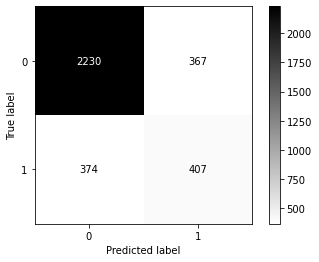

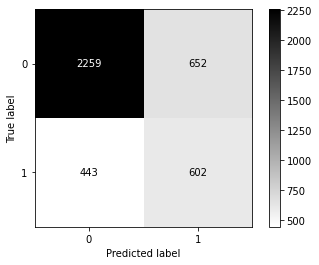

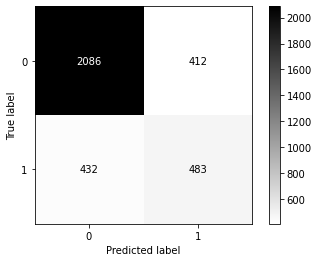

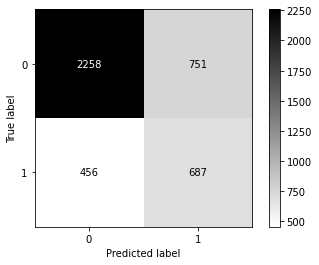

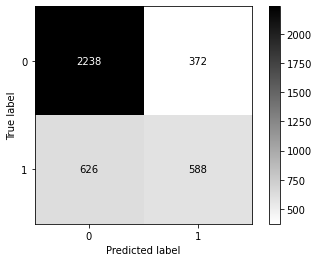

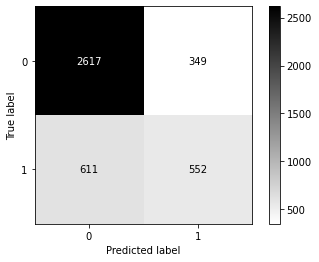

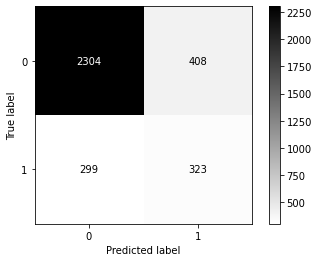

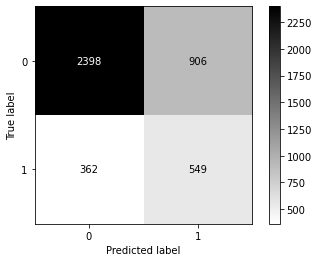

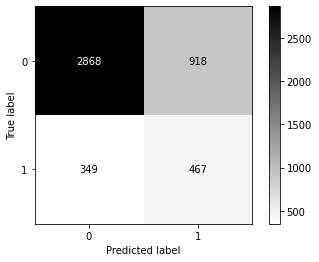

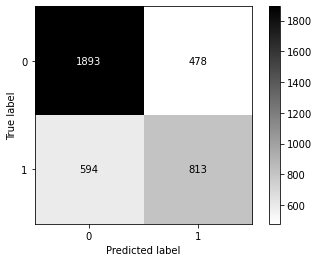

In [25]:
bert_pred
bert_scores, bert_dict, bert_par_scores, bert_par_dict = model_utils.get_report_by_unit(bert_pred,"bert","split")

In [95]:
imp.reload(classes)
labels=['1','0']
bert_rprt=classes.MyReport(bert_dict,bert_par_dict,'bert',labels)

MyReport init called


In [96]:
bert_print_df=bert_rprt.get_print_df()
bert_print_df


,sent_f1,par_f1,sent_recall,par_recall,sent_prec,par_prec
1,0.515761,0.467037,0.545716,0.612560,0.503458,0.387257
0,0.820226,0.814289,0.809126,0.755762,0.835163,0.886847
weighted avg,0.744586,0.747545,0.740042,0.726106,0.756066,0.792190


In [78]:
print_df.to_csv(sep='&',line_terminator="\\",float_format='%.3f')

'&sent_f1&par_f1&sent_recall&par_recall&sent_prec&par_prec\\1&0.516&0.467&0.546&0.613&0.503&0.387\\0&0.820&0.814&0.809&0.756&0.835&0.887\\weighted avg&0.745&0.748&0.740&0.726&0.756&0.792\\'

In [104]:
common_utils.dump_to_file(bert_rprt,"bert_report")

### CRF 

In [61]:
crf_pred=common_utils.load_db(dir_name,"crf.pred.new.76")


Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/crf.pred.new.76.csv,  index False


In [66]:
imp.reload(model_utils)
crf_scores, crf_dict, crf_par_scores, crf_par_dict = model_utils.get_report_by_unit(crf_pred,"crf","split",print_rep=False)

MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called
MySegEval init called


In [98]:
labels=['is_nar','not_nar']

crf_rprt=classes.MyReport(crf_dict,crf_par_dict,'crf',labels)

MyReport init called


In [99]:
crf_print_df=crf_rprt.get_print_df()
crf_print_df

,sent_f1,par_f1,sent_recall,par_recall,sent_prec,par_prec
is_nar,0.544544,0.493692,0.499708,0.459468,0.606244,0.541543
not_nar,0.859127,0.886444,0.884974,0.903634,0.835504,0.870513
weighted avg,0.781183,0.810291,0.788503,0.816288,0.779935,0.808117


In [81]:
print_df.to_csv(sep='&',line_terminator="\\",float_format='%.3f')

'&sent_f1&par_f1&sent_recall&par_recall&sent_prec&par_prec\\is_nar&0.545&0.494&0.500&0.459&0.606&0.542\\not_nar&0.859&0.886&0.885&0.904&0.836&0.871\\weighted avg&0.781&0.810&0.789&0.816&0.780&0.808\\'

In [103]:
common_utils.dump_to_file(crf_rprt,"crf_report")

### SGD report

In [118]:
svm_pred=common_utils.load_db(dir_name,"ens.SGDClassifier.pred.new.30.no.71")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.SGDClassifier.pred.new.30.no.71.csv,  index False


In [155]:
svm_pred=common_utils.load_db(dir_name,'ens.SVC.pred.new.30.no.71')

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.SVC.pred.new.30.no.71.csv,  index False


In [156]:
svm_pred

,ens_predicted,ens_group,ens_split,ens_true,ens_par
0,0,4,0,0,0
1,0,4,0,0,1
2,0,4,0,0,2
3,0,4,0,0,3
4,0,4,0,0,3
...,...,...,...,...,...
38429,0,79,9,0,171
38430,0,79,9,0,172
38431,0,79,9,0,172
38432,0,79,9,0,172


In [158]:
svm_scores, svm_dict, svm_par_scores, svm_par_dict = model_utils.get_report_by_unit(svm_pred,"ens","split",print_rep=False)

In [88]:
svm_dict

{0: {'0': {'precision': 0.8499313186813187,
   'recall': 0.9530227185213708,
   'f1-score': 0.8985296787075693,
   'support': 2597},
  '1': {'precision': 0.7381974248927039,
   'recall': 0.44046094750320103,
   'f1-score': 0.5517241379310345,
   'support': 781},
  'accuracy': 0.8345174659561871,
  'macro avg': {'precision': 0.7940643717870113,
   'recall': 0.6967418330122859,
   'f1-score': 0.7251269083193019,
   'support': 3378},
  'weighted avg': {'precision': 0.8240982307449931,
   'recall': 0.8345174659561871,
   'f1-score': 0.818347580618027,
   'support': 3378},
  'segeval': {'f1': Decimal('0.2219178082191780821917808219'),
   'recall': Decimal('0.1248073959938366718027734977'),
   'precision': Decimal('0.1248073959938366718027734977'),
   'b_sim': Decimal('0.1219879518072289156626506024'),
   's_sim': Decimal('0.9136807817589576547231270358')}},
 1: {'0': {'precision': 0.8096221959858324,
   'recall': 0.9422878735829612,
   'f1-score': 0.8709318939514209,
   'support': 2911},
  

In [157]:
svm_rprt=classes.MyReport(svm_dict,svm_par_dict,'svm',labels=['1','0'])

TypeError: __init__() missing 1 required positional argument: 'name'

In [101]:
svm_print_df=svm_rprt.get_print_df()
svm_print_df

,sent_f1,par_f1,sent_recall,par_recall,sent_prec,par_prec
1,0.549619,0.518216,0.469672,0.458067,0.677116,0.606784
0,0.873889,0.898939,0.921331,0.927538,0.832262,0.872946
weighted avg,0.792773,0.824917,0.805330,0.833950,0.797360,0.824349


In [94]:
print_df.to_csv(sep='&',line_terminator="\\",float_format='%.3f')

'&sent_f1&par_f1&sent_recall&par_recall&sent_prec&par_prec\\1&0.550&0.518&0.470&0.458&0.677&0.607\\0&0.874&0.899&0.921&0.928&0.832&0.873\\weighted avg&0.793&0.825&0.805&0.834&0.797&0.824\\'

In [105]:
common_utils.dump_to_file(svm_rprt,"svm_report")

### Search parameters for ensembler

In [12]:
merged_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,4,0,0,0,0.735761,0.264239,0,0,4,0,0,not_nar,not_nar,0.928988,0.071012,0,0
1,4,0,0,0,0.809237,0.190763,1,1,4,1,0,not_nar,not_nar,0.948798,0.051202,1,1
2,4,0,0,0,0.830174,0.169826,2,2,4,2,0,not_nar,not_nar,0.963766,0.036234,2,2
3,4,0,0,0,0.627892,0.372108,3,3,4,3,0,not_nar,not_nar,0.891811,0.108189,3,3
4,4,0,0,0,0.656868,0.343132,4,3,4,3,0,not_nar,not_nar,0.769472,0.230528,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,0,0,0.795311,0.204689,3773,171,79,171,9,not_nar,not_nar,0.972802,0.027198,3773,171
38777,79,9,0,0,0.860838,0.139162,3774,172,79,172,9,not_nar,not_nar,0.980269,0.019731,3774,172
38778,79,9,0,0,0.875573,0.124427,3775,172,79,172,9,not_nar,not_nar,0.989618,0.010382,3775,172
38779,79,9,0,0,0.865315,0.134685,3776,172,79,172,9,not_nar,not_nar,0.989894,0.010106,3776,172


### Set predicted by ensemble y to dataset

In [14]:
doc_idx=1
y_pred = common_utils.convert_binary_label_to_str(svm_pred.query('ens_group == @doc_idx')['ens_predicted'].tolist())

In [16]:
dataset.doc_map[1].set_pred_y(y_pred)

In [59]:
doc_df=pd.DataFrame()
doc_df.loc[doc_idx,'true']=model_utils.get_colored_from_list(dataset.doc_map[doc_idx].get_y(),'is_nar')
doc_df.loc[doc_idx,'pred']=model_utils.get_colored_from_list(dataset.doc_map[doc_idx].get_pred_y(),'is_nar')
doc_df

,true,pred
1,000|001|002|003|004|005|006|007|008|009|010|01...,000|001|002|003|004|005|006|007|008|009|010|01...


In [64]:
all_doc_colored=pd.DataFrame()
for doc_idx,doc in dataset.doc_map.items():
#     if doc_idx == 3:
#         break
    y_pred = common_utils.convert_binary_label_to_str(svm_pred.query('ens_group == @doc_idx')['ens_predicted'].tolist())
    doc.set_pred_y(y_pred)
    doc.colored_ind_df = pd.DataFrame()
    doc.colored_ind_df.loc[doc_idx,'true']=model_utils.get_colored_from_list(dataset.doc_map[doc_idx].get_y(),'is_nar')
    doc.colored_ind_df.loc[doc_idx,'pred']=model_utils.get_colored_from_list(dataset.doc_map[doc_idx].get_pred_y(),'is_nar')
    all_doc_colored.loc[doc_idx,'true']=doc.colored_ind_df.loc[doc_idx,'true']
    all_doc_colored.loc[doc_idx,'pred']=doc.colored_ind_df.loc[doc_idx,'pred']

In [74]:
dataset.dump_to_file("dataset_new.76.colored")

In [65]:
all_doc_colored

,true,pred
1,000|001|002|003|004|005|006|007|008|009|010|01...,000|001|002|003|004|005|006|007|008|009|010|01...
2,000|001|002|003|004|005|006|007|008|009|010|01...,000|001|002|003|004|005|006|007|008|009|010|01...
3,000|001|002|003|004|005|006|007|008|009|010|01...,<span class='corrStyle'>000|</span><span class...
4,000|001|002|003|004|<span class='corrStyle'>00...,000|001|002|003|004|<span class='corrStyle'>00...
5,000|001|002|003|004|005|006|007|008|009|010|<s...,000|001|002|003|004|005|006|007|008|009|010|<s...
...,...,...
76,000|001|002|003|004|005|006|007|008|009|010|01...,000|001|002|003|004|005|006|007|008|009|010|01...
77,000|001|002|003|004|005|006|007|008|009|010|01...,000|001|002|003|004|005|006|007|008|009|010|01...
78,000|001|002|003|<span class='corrStyle'>004|</...,000|001|002|003|<span class='corrStyle'>004|</...
79,000|001|002|<span class='corrStyle'>003|</span...,000|001|002|003|<span class='corrStyle'>004|</...


In [103]:
index=True
style="numeric_style"
html = all_doc_colored.to_html(
    escape=False, justify="center", index=index)
html = r'<link rel="stylesheet" type="text/css" href="{}.css" /><br>'.format(
    style) + html
# write html to file
print_df_path = os.path.join(
    dataset.path, "all_doc_colored.html"
)
# html
text_file = open(print_df_path, "w")
text_file.write(html)

text_file.close()

NameError: name 'all_doc_colored' is not defined

In [82]:
imp.reload(classes)
wd = classes.WindowDiff()

WindowDiff init called


In [124]:
y_tr=[1,0,1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,0,1]
y_pr=[1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1]

In [137]:
for i,item in enumerate(y_tr):
    print('{:>4}{:>4}{:>4}'.format(i,item,y_pr[i]))

   0   1   1
   1   0   0
   2   1   1
   3   0   0
   4   1   0
   5   1   1
   6   0   0
   7   0   0
   8   0   1
   9   1   1
  10   1   1
  11   1   0
  12   0   0
  13   1   1
  14   1   1
  15   0   1
  16   0   0
  17   0   0
  18   1   1


In [126]:
y_true={}
start,end=wd.get_boundaries_indices(y_tr)
y_true['start']=start
y_true['end']=end
y_true

{'start': [0, 2, 4, 9, 13, 18], 'end': [1, 3, 6, 12, 15, 19]}

In [127]:
y_pred={}
start,end=wd.get_boundaries_indices(y_pr)
y_pred['start']=start
y_pred['end']=end
y_pred

{'start': [0, 2, 5, 8, 13, 18], 'end': [1, 3, 6, 11, 16, 19]}

In [128]:
import re
print(re.search('1$','0001'))

<re.Match object; span=(3, 4), match='1'>


In [129]:
misses=wd.get_near_miss_idx(y_true,y_pred)
misses

{'start': {'fp-1': [8], 'fn+1': [4]}, 'end': {'fn-1': [12], 'fp+1': [16]}}

In [138]:
start_true, end_true = wd.get_boundaries_indices(dataset.doc_map[1].get_y())

NameError: name 'dataset' is not defined

In [111]:
start_pred, end_pred = wd.get_boundaries_indices(dataset.doc_map[1].get_pred_y())

In [112]:
start_pred

[21,
 28,
 43,
 65,
 71,
 81,
 106,
 120,
 125,
 150,
 162,
 164,
 234,
 237,
 262,
 265,
 270,
 283,
 290,
 305,
 360,
 366,
 368,
 438,
 452,
 471,
 540]

In [110]:
start_true

[21, 91, 156, 219, 283, 306, 381, 394, 438, 453, 500, 527, 538]

In [104]:
dataset.doc_map[1].get_y()

['not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',
 'not_nar',

(-0.5, 1.5)

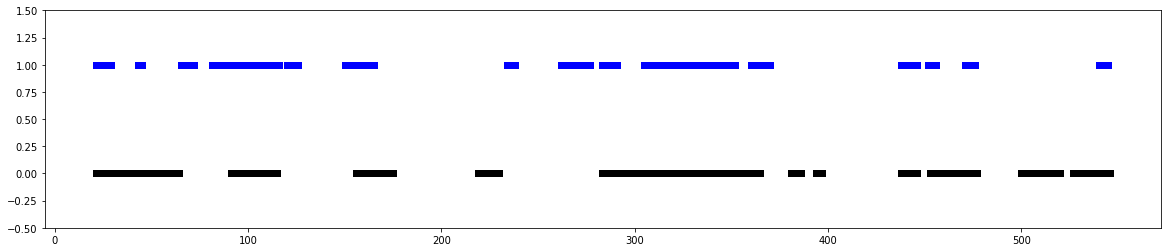

In [130]:
fig, ax = plt.subplots(figsize=(20, 4))



for idx,_ in enumerate(start_true):
    point1 = [start_true[idx],0]
    point2 = [end_true[idx],0]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    ax.plot(x_values, y_values, color='black', label='true', linewidth=7.0)
for idx,_ in enumerate(start_pred):
    point1 = [start_pred[idx],1]
    point2 = [end_pred[idx],1]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    ax.plot(x_values, y_values,color='blue', label='predicted',linewidth=7.0)
plt.ylim([-0.5,1.5])



### Concat ensemble SGC results with BERT and CRF

In [172]:
bert_crf_name="merged.crf.bert.pred.new.30.no.71"
ens_name="ens.SGDClassifier.pred.new.30.no.71"
# ens_name='ens.SVC.pred.new.30.no.71'

In [173]:
merged_db=common_utils.load_db(dir_name,bert_crf_name)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/merged.crf.bert.pred.new.30.no.71.csv,  index False


In [174]:
svm_pred=common_utils.load_db(dir_name,ens_name)

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.SGDClassifier.pred.new.30.no.71.csv,  index False


In [175]:
merged_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38434 entries, 0 to 38433
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bert_group      38434 non-null  int64  
 1   bert_split      38434 non-null  int64  
 2   bert_predicted  38434 non-null  int64  
 3   bert_true       38434 non-null  int64  
 4   bert_proba_0    38434 non-null  float64
 5   bert_proba_1    38434 non-null  float64
 6   bert_sent_idx   38434 non-null  int64  
 7   bert_par        38434 non-null  int64  
 8   crf_group       38434 non-null  int64  
 9   crf_par         38434 non-null  int64  
 10  crf_split       38434 non-null  int64  
 11  crf_predicted   38434 non-null  int64  
 12  crf_true        38434 non-null  int64  
 13  crf_proba_0     38434 non-null  float64
 14  crf_proba_1     38434 non-null  float64
 15  crf_sent_idx    38434 non-null  int64  
 16  ens_par         38434 non-null  int64  
dtypes: float64(4), int64(13)
memory

In [176]:
merged_db

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,4,0,0,0,0.710910,0.289090,0,0,4,0,0,0,0,0.947620,0.052380,0,0
1,4,0,0,0,0.762460,0.237540,1,1,4,1,0,0,0,0.956540,0.043460,1,1
2,4,0,0,0,0.819310,0.180690,2,2,4,2,0,0,0,0.964960,0.035040,2,2
3,4,0,0,0,0.522000,0.478000,3,3,4,3,0,0,0,0.837870,0.162130,3,3
4,4,0,0,0,0.681960,0.318040,4,3,4,3,0,0,0,0.690500,0.309500,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,79,9,0,0,0.702570,0.297430,254,171,79,171,9,0,0,0.975380,0.024620,254,171
38430,79,9,0,0,0.827150,0.172850,255,172,79,172,9,0,0,0.961520,0.038480,255,172
38431,79,9,0,0,0.843220,0.156780,256,172,79,172,9,0,0,0.973810,0.026190,256,172
38432,79,9,0,0,0.833150,0.166850,257,172,79,172,9,0,0,0.974440,0.025560,257,172


In [164]:
merged_db=merged_db.assign(bert_sent_idx=merged_db.groupby(['bert_group']).cumcount())

In [165]:
merged_db=merged_db.assign(crf_sent_idx=merged_db.groupby(['crf_group']).cumcount())

In [166]:
merged_db

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par
0,4,0,0,0,0.710910,0.289090,0,0,4,0,0,0,0,0.947620,0.052380,0,0
1,4,0,0,0,0.762460,0.237540,1,1,4,1,0,0,0,0.956540,0.043460,1,1
2,4,0,0,0,0.819310,0.180690,2,2,4,2,0,0,0,0.964960,0.035040,2,2
3,4,0,0,0,0.522000,0.478000,3,3,4,3,0,0,0,0.837870,0.162130,3,3
4,4,0,0,0,0.681960,0.318040,4,3,4,3,0,0,0,0.690500,0.309500,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38429,79,9,0,0,0.702570,0.297430,254,171,79,171,9,0,0,0.975380,0.024620,254,171
38430,79,9,0,0,0.827150,0.172850,255,172,79,172,9,0,0,0.961520,0.038480,255,172
38431,79,9,0,0,0.843220,0.156780,256,172,79,172,9,0,0,0.973810,0.026190,256,172
38432,79,9,0,0,0.833150,0.166850,257,172,79,172,9,0,0,0.974440,0.025560,257,172


In [143]:
common_utils.save_db(merged_db,dir_name,bert_crf_name)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/merged.crf.bert.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [144]:
svm_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38434 entries, 0 to 38433
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ens_predicted  38434 non-null  int64
 1   ens_group      38434 non-null  int64
 2   ens_split      38434 non-null  int64
 3   ens_true       38434 non-null  int64
 4   ens_par        38434 non-null  int64
dtypes: int64(5)
memory usage: 1.5 MB


In [177]:
svm_pred=svm_pred.assign(ens_sent_idx=svm_pred.groupby(['ens_group']).cumcount())
svm_pred

,ens_predicted,ens_group,ens_split,ens_true,ens_par,ens_sent_idx
0,0,4,0,0,0,0
1,0,4,0,0,1,1
2,0,4,0,0,2,2
3,0,4,0,0,3,3
4,0,4,0,0,3,4
...,...,...,...,...,...,...
38429,0,79,9,0,171,254
38430,0,79,9,0,172,255
38431,0,79,9,0,172,256
38432,0,79,9,0,172,257


In [168]:
common_utils.save_db(svm_pred,dir_name,ens_name)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/ens.SVC.pred.new.30.no.71.csv, 
index False
float_format %.5f


In [178]:
all_pred =  merged_db.merge(svm_pred, left_on=['bert_group', 'bert_sent_idx'], right_on=[
        'ens_group', 'ens_sent_idx'], validate='one_to_one')

In [179]:
common_utils.save_db(all_pred,dir_name,"bert.crf.sgd.new.30.no.71")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/duplicate/bert.crf.sgd.new.30.no.71.csv, 
index False
float_format %.5f


In [171]:
del merged_db
del svm_pred

In [27]:
all_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par_x,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
0,4,0,0,0,0.735761,0.264239,0,0,4,0,...,0.928988,0.071012,0,0,0,4,0,0,0,0
1,4,0,0,0,0.809237,0.190763,1,1,4,1,...,0.948798,0.051202,1,1,0,4,0,0,1,1
2,4,0,0,0,0.830174,0.169826,2,2,4,2,...,0.963766,0.036234,2,2,0,4,0,0,2,2
3,4,0,0,0,0.627892,0.372108,3,3,4,3,...,0.891811,0.108189,3,3,0,4,0,0,3,3
4,4,0,0,0,0.656868,0.343132,4,3,4,3,...,0.769472,0.230528,4,3,0,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,0,0,0.795311,0.204689,254,171,79,171,...,0.972802,0.027198,254,171,0,79,9,0,171,254
38777,79,9,0,0,0.860838,0.139162,255,172,79,172,...,0.980269,0.019731,255,172,0,79,9,0,172,255
38778,79,9,0,0,0.875573,0.124427,256,172,79,172,...,0.989618,0.010382,256,172,0,79,9,0,172,256
38779,79,9,0,0,0.865315,0.134685,257,172,79,172,...,0.989894,0.010106,257,172,0,79,9,0,172,257


### Calculate near-miss errors

In [132]:
all_pred.rename({'ens_par_x':'ens_par'},inplace=True,axis=1)

In [133]:
all_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
0,4,0,0,0,0.735761,0.264239,0,0,4,0,...,0.928988,0.071012,0,0,0,4,0,0,0,0
1,4,0,0,0,0.809237,0.190763,1,1,4,1,...,0.948798,0.051202,1,1,0,4,0,0,1,1
2,4,0,0,0,0.830174,0.169826,2,2,4,2,...,0.963766,0.036234,2,2,0,4,0,0,2,2
3,4,0,0,0,0.627892,0.372108,3,3,4,3,...,0.891811,0.108189,3,3,0,4,0,0,3,3
4,4,0,0,0,0.656868,0.343132,4,3,4,3,...,0.769472,0.230528,4,3,0,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,0,0,0.795311,0.204689,254,171,79,171,...,0.972802,0.027198,254,171,0,79,9,0,171,254
38777,79,9,0,0,0.860838,0.139162,255,172,79,172,...,0.980269,0.019731,255,172,0,79,9,0,172,255
38778,79,9,0,0,0.875573,0.124427,256,172,79,172,...,0.989618,0.010382,256,172,0,79,9,0,172,256
38779,79,9,0,0,0.865315,0.134685,257,172,79,172,...,0.989894,0.010106,257,172,0,79,9,0,172,257


In [83]:
start_true, end_true = wd.get_boundaries_indices(all_pred['ens_true'].tolist())
start_pred, end_pred = wd.get_boundaries_indices(all_pred['ens_predicted'].tolist())

In [84]:
misses=wd.get_near_miss_idx(y_true={'start':start_true, 'end':end_true},y_pred={'start':start_pred, 'end': end_pred})
misses

{'start': {'fp-1': [4009,
   6009,
   6030,
   6903,
   8439,
   8570,
   9247,
   11052,
   11199,
   12829,
   13343,
   14541,
   18725,
   20009,
   20312,
   20755,
   24667,
   25401,
   26237,
   28536,
   28603,
   29589,
   32020,
   32725,
   34740,
   35703,
   35780,
   35824,
   35896,
   38403,
   38553,
   38607],
  'fn+1': [587,
   1753,
   2073,
   2202,
   2405,
   2538,
   2791,
   3069,
   3140,
   3857,
   4247,
   4717,
   7558,
   7600,
   8529,
   11624,
   12241,
   12394,
   12419,
   12634,
   13567,
   14373,
   14677,
   14691,
   16074,
   16240,
   16419,
   19436,
   19974,
   20370,
   20476,
   22264,
   24163,
   24754,
   27828,
   27915,
   29674,
   31155,
   31409,
   32439,
   36929,
   37712,
   38525]},
 'end': {'fn-1': [2180,
   2394,
   2610,
   3107,
   5740,
   6915,
   7037,
   7090,
   7698,
   7740,
   7971,
   8101,
   10591,
   11224,
   11293,
   11783,
   12453,
   12696,
   12910,
   12990,
   13339,
   14333,
   14770,
   15926,
  

In [72]:
all_pred.loc[4007:4012][['ens_predicted','ens_true']]

,ens_predicted,ens_true
4007,1,0
4008,0,0
4009,1,0
4010,1,1
4011,1,1
4012,1,1


In [73]:
all_pred.loc[584:590][['ens_predicted','ens_true']]

,ens_predicted,ens_true
584,0,0
585,0,0
586,0,0
587,0,1
588,1,1
589,1,1
590,1,1


In [74]:
all_pred.loc[2178:2182][['ens_predicted','ens_true']]

,ens_predicted,ens_true
2178,1,1
2179,0,1
2180,0,0
2181,0,0
2182,0,0


In [75]:
all_pred.loc[12:18][['ens_predicted','ens_true']]

,ens_predicted,ens_true
12,1,1
13,1,1
14,1,0
15,0,0
16,0,0
17,1,1
18,1,1


### Fix near misses and calculate new F1 measure

In [96]:
fixed_near_miss=all_pred[['ens_group','ens_sent_idx','ens_predicted','ens_true','ens_split']].copy()
fixed_near_miss['ens_par']=all_pred['ens_par_x']
fixed_near_miss

,ens_group,ens_sent_idx,ens_predicted,ens_true,ens_split,ens_par
0,4,0,0,0,0,0
1,4,1,0,0,0,1
2,4,2,0,0,0,2
3,4,3,0,0,0,3
4,4,4,0,0,0,3
...,...,...,...,...,...,...
38776,79,254,0,0,9,171
38777,79,255,0,0,9,172
38778,79,256,0,0,9,172
38779,79,257,0,0,9,172


In [106]:
common_miss = set(misses['start']['fp-1'])
for k,v in misses.items():
    for i,j in v.items():
        common_miss = common_miss & set(j)
common_miss

set()

In [97]:
fixed_near_miss.loc[misses['start']['fp-1'],'ens_predicted']=0
fixed_near_miss.loc[misses['start']['fn+1'],'ens_predicted']=1
fixed_near_miss.loc[misses['end']['fp+1'],'ens_predicted']=0
fixed_near_miss.loc[misses['end']['fn-1'],'ens_predicted']=1

In [122]:
fixed_near_miss.loc[misses['end']['fp+1']]

,ens_group,ens_sent_idx,ens_predicted,ens_true,ens_split,ens_par
15,4,15,0,0,0,4
204,4,204,0,0,0,43
5775,34,324,0,0,1,42
5880,37,51,0,0,1,24
7362,7,28,0,0,2,22
7603,7,269,0,0,2,153
10863,1,116,0,0,3,56
12522,27,142,0,0,3,30
12828,44,94,0,0,3,41
14510,75,34,0,0,3,6


In [100]:
fixed_near_miss[fixed_near_miss['ens_predicted']!=all_pred['ens_predicted']]

,ens_group,ens_sent_idx,ens_predicted,ens_true,ens_split,ens_par
587,14,116,1,1,0,33
1753,15,614,1,1,0,111
2073,29,74,1,1,0,32
2180,29,181,1,0,0,37
2202,29,203,1,1,0,40
...,...,...,...,...,...,...
38413,78,77,1,0,9,48
38525,79,3,1,1,9,1
38553,79,31,0,0,9,19
38607,79,85,0,0,9,55


In [141]:
common_utils.save_db(fixed_near_miss,dir_name,"svc.ens.fixed_near_miss")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/svc.ens.fixed_near_miss.csv,  index False


In [ ]:
nm_scores, nm_dict, np_par_score, np_par_dict = model_utils.get_report_by_unit(fixed_near_miss,"ens","split")

In [ ]:
all_scores, all_dict, all_par_score, all_par_dict = model_utils.get_report_by_unit(all_pred,"ens","split")

In [126]:
np.mean(nm_scores),np.mean(np_par_score)

(0.7936932958386965, 0.8228039102278834)

In [135]:
np.mean(all_scores),np.mean(all_par_score)

(0.7927728021835472, 0.8249171801873943)

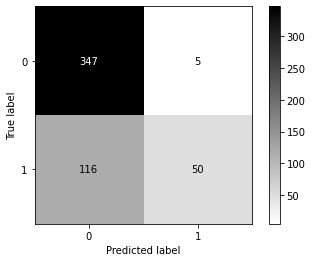

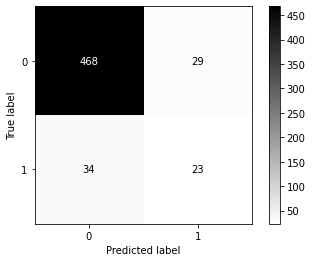

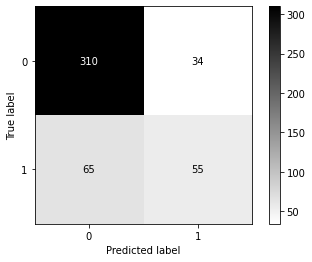

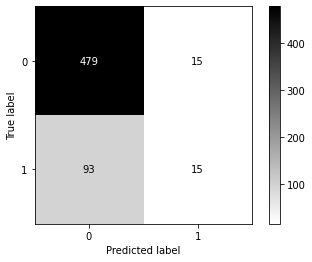

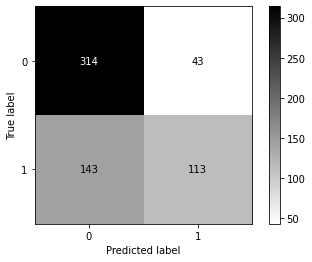

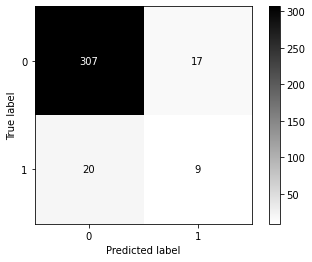

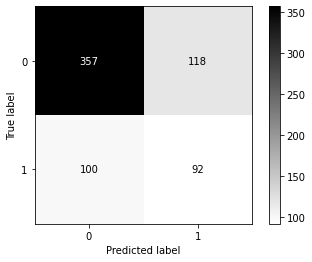

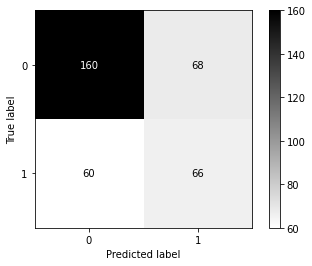

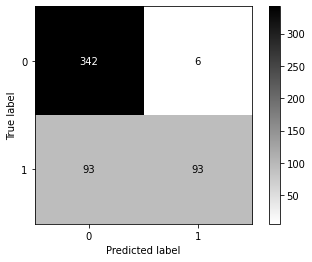

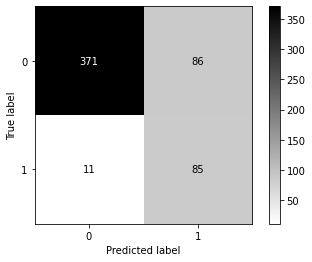

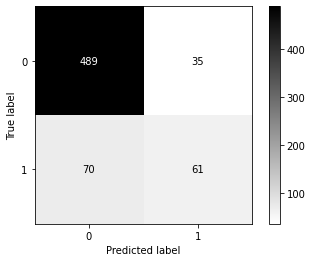

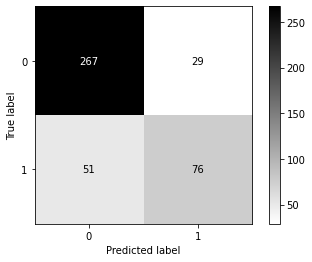

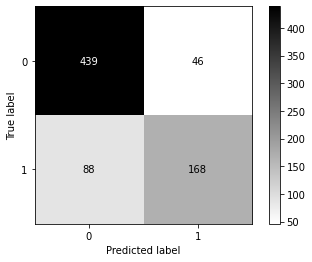

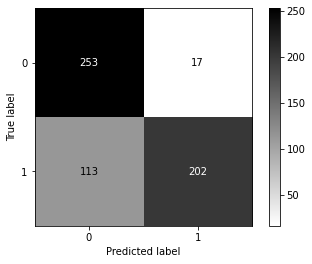

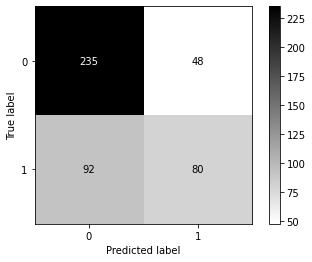

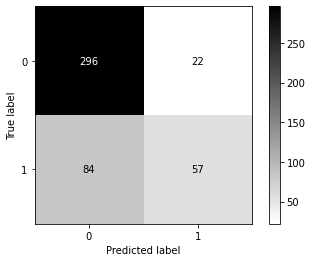

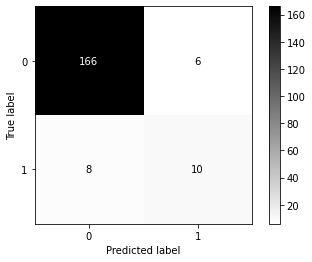

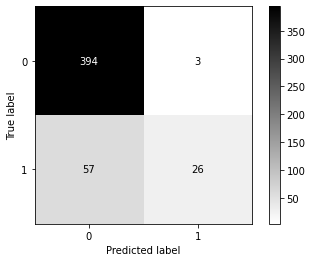

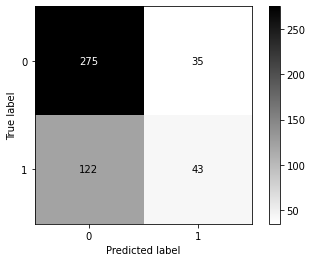

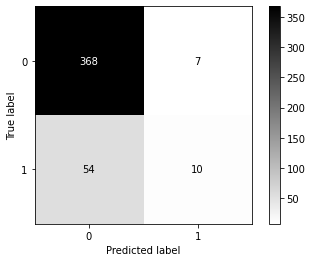

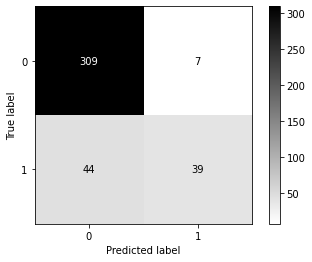

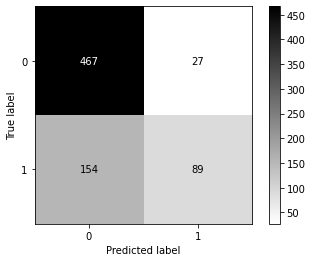

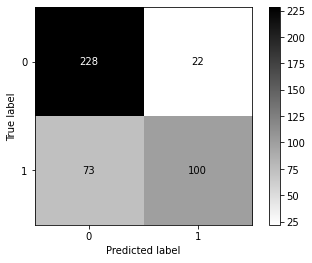

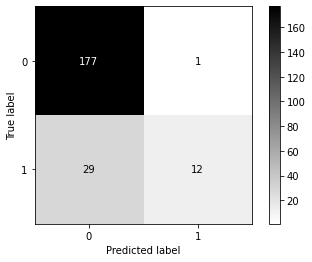

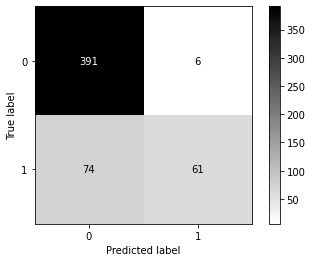

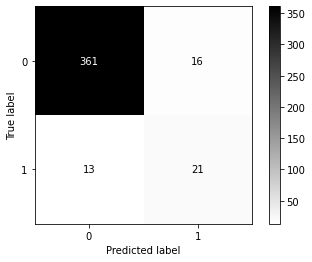

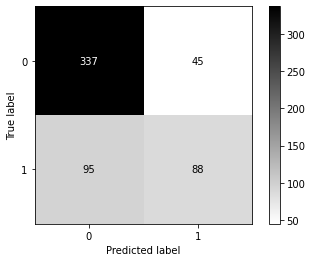

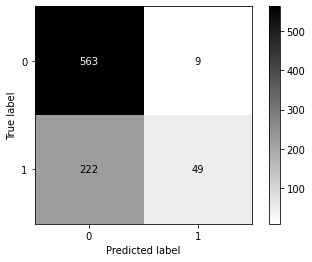

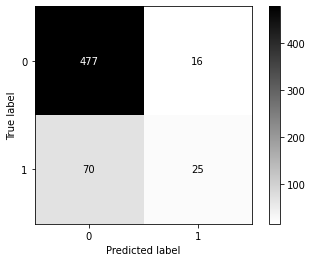

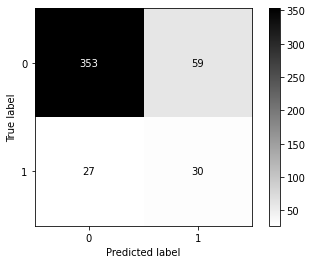

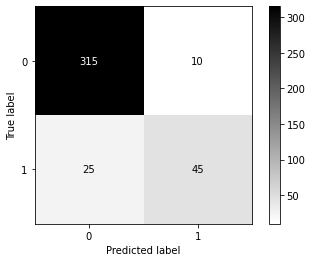

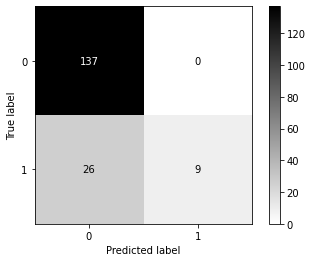

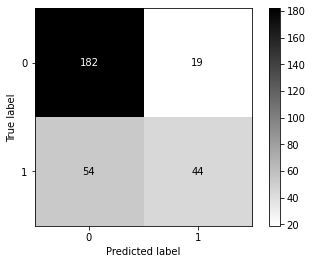

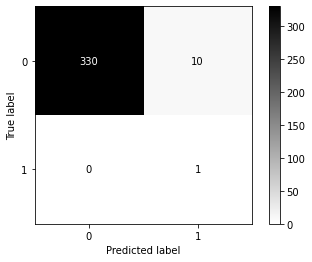

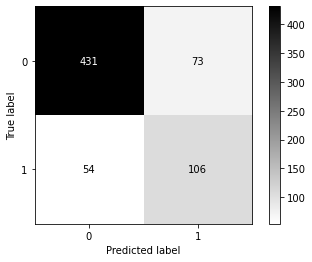

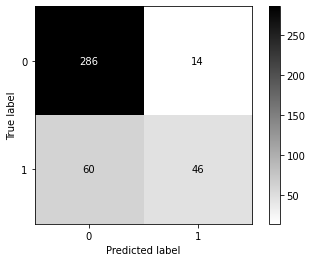

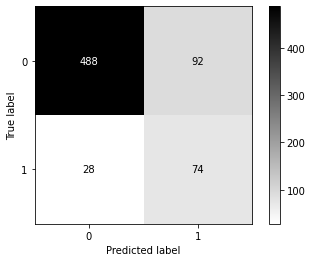

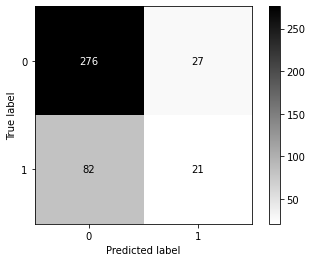

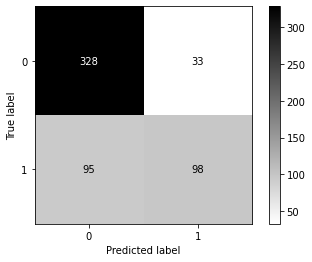

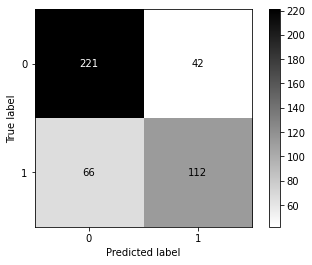

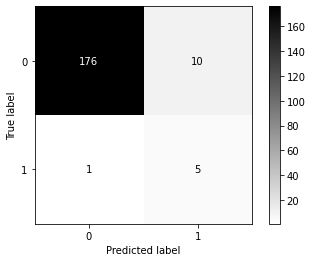

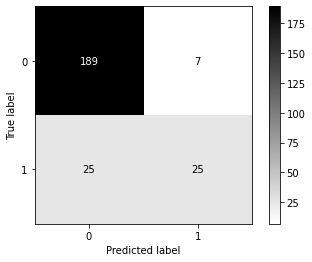

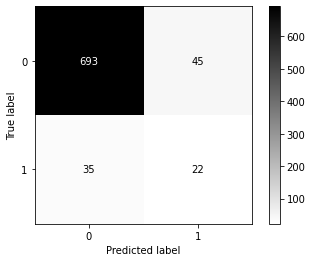

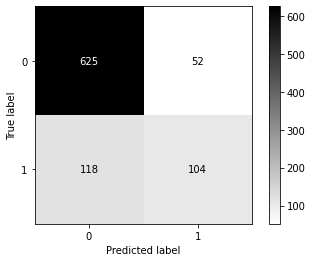

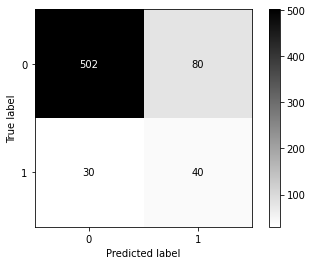

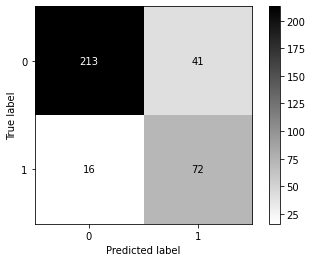

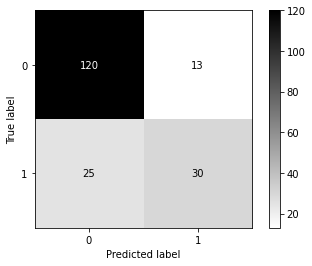

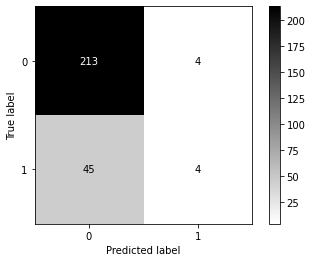

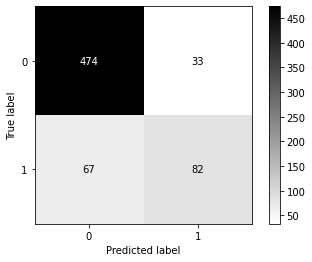

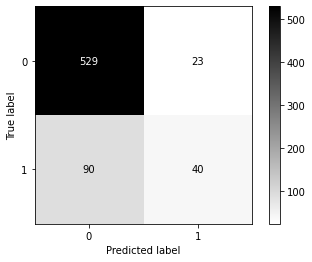

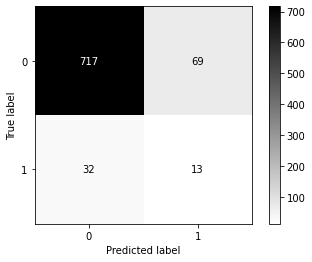

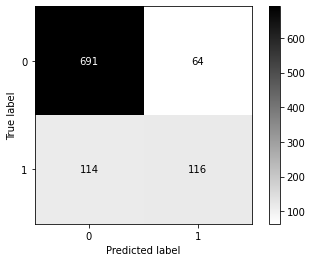

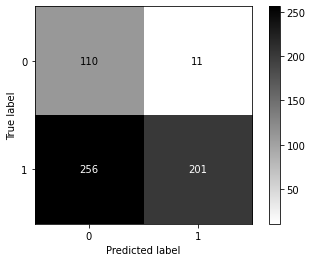

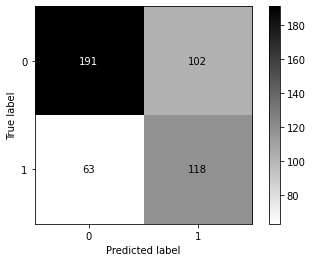

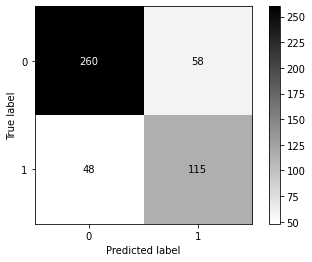

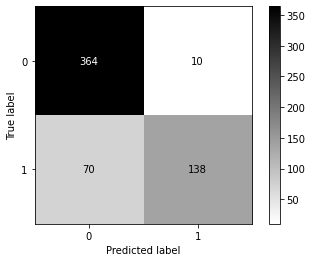

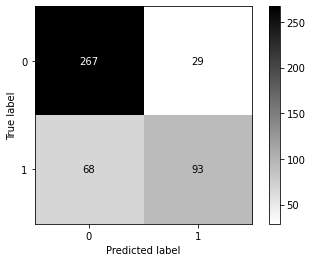

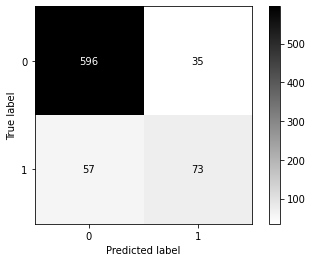

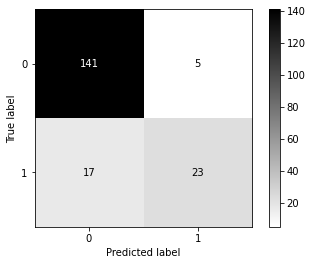

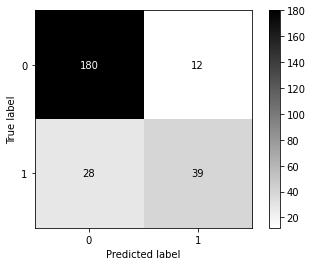

In [137]:
nm_doc_scores, nm_doc_dict, np_doc_par_score, np_doc_par_dict = model_utils.get_report_by_unit(fixed_near_miss,"ens","group",False)
all_doc_scores, all_doc_dict, all_doc_par_score, all_doc_par_dict = model_utils.get_report_by_unit(all_pred,"ens","group",False)
np.mean(nm_doc_scores),np.mean(all_doc_scores)

In [138]:
np.mean(nm_doc_scores),np.mean(all_doc_scores)

(0.7978730130722645, 0.796670339796042)

In [110]:
total_fn=len(all_pred[(all_pred['ens_true']==1) & (all_pred['ens_predicted']==0)])
total_fn

5280

In [111]:
total_fp=len(all_pred[(all_pred['ens_true']==0) & (all_pred['ens_predicted']==1)])
total_fp

2279

In [112]:
total_miss = len(all_pred[all_pred['ens_true']!=all_pred['ens_predicted']])
total_miss

7559

In [113]:
total_near_misses=0
near_fp=0
near_fn=0
for k,v in misses.items():
    for i,j in v.items():
        print("{:>8} {:>8}{:>4}".format(k,i,len(j)))
        total_near_misses+=len(j)
        if 'fp' in i:
            near_fp+=len(j)
            print('\t{:>4} ratio: {:.2f}'.format(i,len(j)*100/total_fp))
        if 'fn' in i:
            near_fn+=len(j)
            print('\t{:>4} ratio: {:.2f}'.format(i,len(j)*100/total_fn))

print('total {} fp {} fn {}'.format(total_near_misses,near_fp,near_fn))

   start     fp-1  32
	fp-1 ratio: 1.40
   start     fn+1  43
	fn+1 ratio: 0.81
     end     fn-1  56
	fn-1 ratio: 1.06
     end     fp+1  25
	fp+1 ratio: 1.10
total 156 fp 57 fn 99


In [150]:
near_miss_ratio=total_near_misses/total_miss
near_miss_ratio

0.020637650482868104

In [171]:
print(total_fp/total_miss,total_fn/total_miss)

0.30149490673369495 0.698505093266305


In [163]:
fp_miss_ratio=near_fp/total_fp
fp_miss_ratio

0.025010969723562967

In [165]:
fn_miss_ratio=near_fn/total_fn
fn_miss_ratio

0.01875

### Fix 1 sentence missing in the middle + near miss

In [145]:
true_narr=all_pred[all_pred['ens_true']==1]

In [155]:
middle_miss=true_narr['ens_predicted'].where(((true_narr['ens_predicted']==0) & (true_narr['ens_predicted'].shift(1) == 1) &(true_narr['ens_predicted'].shift(-1)==1)))
middle_miss.dropna(inplace=True)

In [159]:
mid_miss_indices=middle_miss.index.tolist()
len(mid_miss_indices)

281

In [160]:
fixed_near_mid_miss=fixed_near_miss.copy()

In [161]:
fixed_near_mid_miss.loc[mid_miss_indices,'ens_predicted']=1

### Ratio of near-miss among all false negative

In [167]:
len(mid_miss_indices)*100/total_fn

5.321969696969697

In [165]:
imp.reload(model_utils)
imp.reload(common_utils)
nm_mid_doc_scores, nm_mid_doc_dict, np_mid_doc_par_score, np_min_doc_par_dict = model_utils.get_report_by_unit(fixed_near_mid_miss,"ens","group",2,False)
np.mean(nm_mid_doc_scores)

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

0.8065861623384297

In [166]:
common_utils.save_db(fixed_near_mid_miss,dir_name,"svc.ens.fixed_near.mid_miss")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/svc.ens.fixed_near.mid_miss.csv,  index False


### Count stand-alone false positive

In [177]:
true_not_nar=all_pred[all_pred['ens_true']==0].copy()

In [178]:
true_not_nar

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
0,4,0,0,0,0.735761,0.264239,0,0,4,0,...,0.928988,0.071012,0,0,0,4,0,0,0,0
1,4,0,0,0,0.809237,0.190763,1,1,4,1,...,0.948798,0.051202,1,1,0,4,0,0,1,1
2,4,0,0,0,0.830174,0.169826,2,2,4,2,...,0.963766,0.036234,2,2,0,4,0,0,2,2
3,4,0,0,0,0.627892,0.372108,3,3,4,3,...,0.891811,0.108189,3,3,0,4,0,0,3,3
4,4,0,0,0,0.656868,0.343132,4,3,4,3,...,0.769472,0.230528,4,3,0,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,0,0,0.795311,0.204689,254,171,79,171,...,0.972802,0.027198,254,171,0,79,9,0,171,254
38777,79,9,0,0,0.860838,0.139162,255,172,79,172,...,0.980269,0.019731,255,172,0,79,9,0,172,255
38778,79,9,0,0,0.875573,0.124427,256,172,79,172,...,0.989618,0.010382,256,172,0,79,9,0,172,256
38779,79,9,0,0,0.865315,0.134685,257,172,79,172,...,0.989894,0.010106,257,172,0,79,9,0,172,257


In [180]:
false_single_nar=true_not_nar['ens_predicted'].where(((true_not_nar['ens_predicted']==1) & 
                                                 (true_not_nar['ens_predicted'].shift(1) == 0) &
                                                 (true_not_nar['ens_predicted'].shift(-1)==0) &
                                                 (true_not_nar['ens_predicted'].shift(2)==0) &
                                                 (true_not_nar['ens_predicted'].shift(-2)==0)
                                                ))
false_single_nar.info()

<class 'pandas.core.series.Series'>
Int64Index: 28764 entries, 0 to 38780
Series name: ens_predicted
Non-Null Count  Dtype  
--------------  -----  
220 non-null    float64
dtypes: float64(1)
memory usage: 449.4 KB


In [182]:
false_single_nar.dropna(inplace=True)
false_single_nar

14       1.0
203      1.0
207      1.0
390      1.0
397      1.0
        ... 
38082    1.0
38403    1.0
38553    1.0
38602    1.0
38633    1.0
Name: ens_predicted, Length: 220, dtype: float64

In [188]:
stand_alone_indices=false_single_nar.index.tolist()
stand_alone_indices

[14,
 203,
 207,
 390,
 397,
 400,
 635,
 737,
 740,
 764,
 1198,
 1427,
 1431,
 1453,
 1828,
 1865,
 1964,
 2136,
 2327,
 2425,
 2561,
 2645,
 2878,
 2883,
 3083,
 3108,
 3368,
 3486,
 3660,
 3956,
 4094,
 4182,
 4185,
 5774,
 6009,
 6220,
 6292,
 6383,
 6435,
 6903,
 6954,
 6958,
 7093,
 7226,
 7327,
 7361,
 7427,
 7515,
 7593,
 7718,
 7907,
 8439,
 8966,
 9247,
 9263,
 9709,
 9726,
 9816,
 10219,
 10418,
 10472,
 10476,
 10872,
 10981,
 10984,
 11009,
 11199,
 11570,
 11829,
 11871,
 12161,
 12380,
 12604,
 12655,
 12810,
 13073,
 13343,
 13630,
 13649,
 13750,
 13753,
 13771,
 13776,
 13836,
 13839,
 13984,
 14535,
 14589,
 14674,
 14861,
 14899,
 14928,
 15198,
 15232,
 15662,
 16319,
 16426,
 16504,
 16530,
 16701,
 16791,
 17133,
 17154,
 17303,
 17628,
 18079,
 18509,
 18512,
 18744,
 19105,
 19214,
 19289,
 19320,
 19377,
 19442,
 20130,
 20312,
 20696,
 20826,
 21181,
 21533,
 21614,
 21726,
 21753,
 21757,
 22351,
 22957,
 23069,
 23238,
 23483,
 23904,
 23930,
 23983,
 2455

In [189]:
len(stand_alone_indices)*100/total_fp

9.653356735410268

In [190]:
fixed_near_mid_alone_miss=fixed_near_mid_miss.copy()

In [191]:
fixed_near_mid_alone_miss.loc[stand_alone_indices,'ens_predicted']=0

In [192]:
common_utils.save_db(fixed_near_mid_alone_miss,dir_name,"svc.ens.fixed_near.mid.alone_miss")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/svc.ens.fixed_near.mid.alone_miss.csv,  index False


In [193]:
imp.reload(model_utils)
imp.reload(common_utils)
nm_mid_alone_scores, nm_mid_alone_dict, np_mid_alone_par_score, np_min_alone_par_dict = model_utils.get_report_by_unit(fixed_near_mid_alone_miss,"ens","split",2,False)
np.mean(nm_mid_alone_scores)

0.8069612351373067

### Extract new narratives

In [177]:
all_pred[(all_pred['ens_true']==0) & (all_pred['ens_predicted']==1)]

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par_x,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
14,4,0,1,0,0.190261,0.809739,14,3,4,3,...,0.118391,0.881609,14,3,1,4,0,0,3,14
203,4,0,1,0,0.419259,0.580741,203,42,4,42,...,0.211463,0.788537,203,42,1,4,0,0,42,203
207,4,0,1,0,0.459416,0.540584,207,44,4,44,...,0.276978,0.723022,207,44,1,4,0,0,44,207
225,4,0,1,0,0.222399,0.777601,225,51,4,51,...,0.222949,0.777051,225,51,1,4,0,0,51,225
226,4,0,1,0,0.401245,0.598755,226,51,4,51,...,0.243167,0.756833,226,51,1,4,0,0,51,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38621,79,9,0,0,0.819654,0.180346,99,64,79,64,...,0.021746,0.978254,99,64,1,79,9,0,64,99
38625,79,9,1,0,0.324156,0.675844,103,68,79,68,...,0.199494,0.800506,103,68,1,79,9,0,68,103
38633,79,9,1,0,0.084766,0.915234,111,75,79,75,...,0.756211,0.243789,111,75,1,79,9,0,75,111
38646,79,9,1,0,0.121183,0.878817,124,83,79,83,...,0.545429,0.454571,124,83,1,79,9,0,83,124


In [24]:
all_pred=common_utils.load_db(dir_name,"bert.crf.svc.new.76")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.crf.svc.new.76.csv,  index False


In [25]:
df=all_pred

In [26]:
non_nar=all_pred[all_pred['ens_true']==0]

In [27]:
false_nar=non_nar.query('ens_predicted==1')

In [41]:
false_nar_grouped=false_nar.groupby(false_nar.index - np.arange(len(false_nar)))[['ens_group','ens_sent_idx']]

In [42]:
false_nar

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
14,4,0,1,0,0.190261,0.809739,14,3,4,3,...,0.118391,0.881609,14,3,1,4,0,0,3,14
203,4,0,1,0,0.419259,0.580741,203,42,4,42,...,0.211463,0.788537,203,42,1,4,0,0,42,203
207,4,0,1,0,0.459416,0.540584,207,44,4,44,...,0.276978,0.723022,207,44,1,4,0,0,44,207
225,4,0,1,0,0.222399,0.777601,225,51,4,51,...,0.222949,0.777051,225,51,1,4,0,0,51,225
226,4,0,1,0,0.401245,0.598755,226,51,4,51,...,0.243167,0.756833,226,51,1,4,0,0,51,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38621,79,9,0,0,0.819654,0.180346,99,64,79,64,...,0.021746,0.978254,99,64,1,79,9,0,64,99
38625,79,9,1,0,0.324156,0.675844,103,68,79,68,...,0.199494,0.800506,103,68,1,79,9,0,68,103
38633,79,9,1,0,0.084766,0.915234,111,75,79,75,...,0.756211,0.243789,111,75,1,79,9,0,75,111
38646,79,9,1,0,0.121183,0.878817,124,83,79,83,...,0.545429,0.454571,124,83,1,79,9,0,83,124


In [43]:
false_nar_grouped

In [44]:
len(false_nar_grouped)

770

In [56]:
new_nar={}
for i,(_, d) in enumerate(false_nar_grouped):
    if(d.shape[0]>1):
        doc_idx=d['ens_group'].unique()[0]
        if doc_idx in new_nar:
            new_nar[doc_idx].append(d['ens_sent_idx'].tolist()) 
        else:
            new_nar[doc_idx]=[d['ens_sent_idx'].tolist()]

In [57]:
new_nar

{4: [[225, 226, 227, 228, 229], [231, 232, 233]],
 14: [[242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]],
 15: [[42, 43],
  [297, 298],
  [405, 406, 407],
  [450, 451],
  [502, 503, 504, 505, 506, 507, 508, 509, 510]],
 18: [[49, 50, 51]],
 29: [[109, 110, 111, 112, 113]],
 32: [[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104],
  [106, 107],
  [128, 129, 130, 131, 132, 133, 134],
  [210, 211, 212, 213]],
 36: [[146, 147, 148, 149]],
 70: [[12, 13, 14], [105, 106], [241, 242]],
 5: [[57, 58], [147, 148], [435, 436]],
 6: [[17, 18],
  [74, 75],
  [77, 78, 79, 80, 81],
  [105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116],
  [154, 155, 156, 157, 158, 159, 160, 161, 162],
  [165, 166, 167, 168, 169, 170],
  [240, 241, 242],
  [540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552],
  [672, 673]],
 13: [[3, 4]],
 34: [[136, 137, 138, 139, 140, 141, 142, 143], [361, 362, 363]],
 37: [[45, 46]],
 62: [[16, 17],
  [27, 28, 29],
  [246, 247],
  [252, 

In [ ]:
sent_db = common_utils.concat_dbs(dir_name,"sent_db")#,defines.SENT_FEATURES)

In [58]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38802 entries, 0 to 38801
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   file_idx           38802 non-null  int64  
 1   sent_idx           38802 non-null  int64  
 2   is_question        38802 non-null  float64
 3   text               38802 non-null  object 
 4   sent_idx_in_block  38802 non-null  float64
 5   block_idx          38802 non-null  float64
 6   is_nar             38802 non-null  float64
 7   doc_idx            38802 non-null  float64
 8   par_db_idx         38802 non-null  float64
 9   par_idx_in_doc     38802 non-null  float64
 10  par_pos_in_doc     38802 non-null  float64
 11  par_type           38802 non-null  object 
 12  block_type         38802 non-null  object 
 13  nar_idx            38802 non-null  float64
 14  sent_len           38802 non-null  float64
 15  is_client          38802 non-null  int64  
 16  sent_idx_in_par    388

In [119]:
nar_db=pd.DataFrame(columns=['text'])
for doc_idx,nar_list in new_nar.items():
    for idx,nar in enumerate(nar_list):
        nar_db.loc['{}_{}'.format(doc_idx,idx),'text']='. '.join(sent_db[(sent_db['file_idx']==doc_idx)&(sent_db['sent_idx'].isin(nar))]['text'].tolist())

In [121]:
with pd.option_context('display.max_colwidth', None):#,'display.max_rows', None): 
    display(nar_db)

,text
4_0,ישירות לזה שחתמתי מולו את החוזה. ולהגיד לו שמע. זה מה שסוכם. מה שקורה עכשיו פה עם הצוות שאנשים לא יודעים ולא זה זה לא נעים לי. זה לא נעים לי זה לא מה שסוכם גם והם לא יודעים ו ו לא יודע
4_1,וגם ולא עשיתי את זה. כי הרגשתי גם כאילו אני מרגיש איזה אשמה. אז כאילו מה אני אבוא ויעמוד על על שלי כאילו
14_0,אני לא יודע איך יש קשר בין הדברים אני רק יודע שזה בא ביחד. כי כשירד שם גם ירד שם. כאילו ה הרצון ונגיד עכשיו שהייתי צריך לשלם את החודש הזה. אז אמרתי לעצמי. כאילו אתמול או שלשום אמרתי לעצמי. טוב אני אלך מתי שהוא לבנק. ו אתמול אמרתי את זה. אמרתי אני אלך מתי שהוא לבנק. והיום בדרך בנסיעה. אמרתי לא זה לא אפשרי אני לא יכול כל דבר ככה לדחות. ונסעתי לבנק שזה לא באמת סיפור זה 123 דקות
15_0,אז ראיתי שאני לא אספיק גם לצאת גם לחזור. אז אמרתי
15_1,לא בתור ואז אני כאילו לא יוצא בתור. חוצפן בתור מישהו שמערער על מה שהוא אמר
...,...
64_5,היא כאילו נתנה לו את ההבטחה שהיא לא תהיה עם אף אחד אחר. רק אז הוא נתן לה גט. וואו
64_6,סתם יצאתי מהמכון כושר ו. הייתה רוח חזקה מטורפת שנשבה לי על הפנים
78_0,של ללכת כמה רחובות. כן אתה תלך עוד כמה רחובות תקח עוד אוטובוס תשלם מונית אבל תשאר עם אותה רופאת משפחה שמכירה אותך 123 שנים לדוגמה עכשיו זה מה ש
79_0,להתקשר. כן אה אבל XXX לאמא ו


In [37]:
imp.reload(common_utils)
common_utils.dump_to_file(new_nar,dir_name,'false.pos.narrative')

In [39]:
length={}
for i,v in new_nar.items():
    if len(v['sent_idx']) not in length:
        length[len(v['sent_idx'])]=1
    else:
        length[len(v['sent_idx'])]+=1
        

In [42]:
length

{1: 393,
 5: 26,
 3: 59,
 11: 7,
 2: 137,
 9: 10,
 15: 8,
 7: 17,
 4: 43,
 12: 8,
 6: 24,
 13: 6,
 8: 7,
 16: 4,
 21: 1,
 10: 11,
 14: 5,
 18: 1,
 24: 2,
 22: 1}

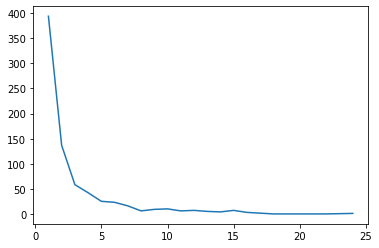

In [45]:
lists = sorted(length.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [47]:
total_new_narr=sum(length.values())

In [65]:
for k,v in sorted(length.items()):
    print("{} {:>.2f}".format(k,v*100/total_new_narr))

1 51.04
2 17.79
3 7.66
4 5.58
5 3.38
6 3.12
7 2.21
8 0.91
9 1.30
10 1.43
11 0.91
12 1.04
13 0.78
14 0.65
15 1.04
16 0.52
18 0.13
21 0.13
22 0.13
24 0.26


In [204]:
all_pred['crf_predicted']

0        not_nar
1        not_nar
2        not_nar
3        not_nar
4        not_nar
          ...   
38776    not_nar
38777    not_nar
38778    not_nar
38779    not_nar
38780    not_nar
Name: crf_predicted, Length: 38781, dtype: object

In [255]:
all_pred_crf01 = all_pred.replace({'crf_predicted': 'is_nar', 'crf_true': 'is_nar'}, 
    {'crf_predicted': 1, 'crf_true': 1}, regex=True)
all_pred_crf01 = all_pred_crf01.replace({'crf_predicted': 'not_nar', 'crf_true': 'not_nar'}, 
    {'crf_predicted': 0, 'crf_true': 0}, regex=True)
all_pred_crf01['crf_predicted'].unique()

array([0, 1])

In [151]:
all_pred['crf_true']

0        0
1        0
2        0
3        0
4        0
        ..
38429    0
38430    0
38431    0
38432    0
38433    0
Name: crf_true, Length: 38434, dtype: int64

In [256]:
common_utils.save_db(all_pred_crf01,dir_name,"bert.crf.svc.new.76.label.01")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.crf.svc.new.76.label.01.csv,  index False


In [153]:
imp.reload(classes)
imp.reload(model_utils)
my_tables=classes.MyScoreSummarizer(all_pred)
my_tables.get_all_scores()

TypeError: __init__() missing 1 required positional argument: 'fix_list'

In [351]:
my_tables.my_fixer.stat

{'bert': {'near': {'tot': 346, 'fp': 162, 'fn': 184},
  'mid': 1039,
  'stand_alone': 1428,
  'total_fp': 5613,
  'total_fn': 4546},
 'crf': {'near': {'tot': 100, 'fp': 48, 'fn': 52},
  'mid': 23,
  'stand_alone': 24,
  'total_fp': 3253,
  'total_fn': 4955},
 'ens': {'near': {'tot': 156, 'fp': 57, 'fn': 99},
  'mid': 281,
  'stand_alone': 220,
  'total_fp': 2279,
  'total_fn': 5280}}

In [352]:
err_stat_db=pd.DataFrame()
for est_name,est_stat in my_tables.my_fixer.stat.items():
    for stat_type,stat_val in est_stat.items():
        if stat_type=='near':
            for near_name,near_val in stat_val.items():
                err_stat_db.loc["{}_{}".format(stat_type,near_name),est_name]=near_val
        else:
            err_stat_db.loc["{}".format(stat_type),est_name]=stat_val
            if stat_type in ['mid','stand_alone']:
                err_stat_db.loc["{}_rate".format(stat_type),est_name]=stat_val*100/estimator['total_fp']
            if 'total' in err_type:
                err_stat_db.loc["{}_rate".format(stat_type),est_name]=stat_val*100/(estimator['total_fp']+estimator['total_fn'])
err_stat_db

,bert,crf,ens
near_tot,346.000000,100.000000,156.000000
near_fp,162.000000,48.000000,57.000000
near_fn,184.000000,52.000000,99.000000
mid,1039.000000,23.000000,281.000000
mid_rate,13.745204,0.304273,3.717423
stand_alone,1428.000000,24.000000,220.000000
stand_alone_rate,18.891388,0.317502,2.910438
total_fp,5613.000000,3253.000000,2279.000000
total_fp_rate,74.255854,43.034793,30.149491
total_fn,4546.000000,4955.000000,5280.000000


In [353]:
common_utils.save_db(err_stat_db,dir_name,'fp.fn.error.stat')

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/fp.fn.error.stat.csv,  index False


In [354]:
for k,estimator in my_tables.my_fixer.stat.items():
    print(k)
    for err_type,val in estimator.items():
        if err_type in ['mid','stand_alone']:
            print("\t{:<8} {:<16} ratio {:.3f}".format(k,err_type,val*100/estimator['total_fp']))
        if 'total' in err_type:
            print("\t{:<8} {:<16} ratio {:.3f}".format(k,err_type,val*100/(estimator['total_fp']+estimator['total_fn'])))



bert
	bert     mid              ratio 18.511
	bert     stand_alone      ratio 25.441
	bert     total_fp         ratio 55.252
	bert     total_fn         ratio 44.748
crf
	crf      mid              ratio 0.707
	crf      stand_alone      ratio 0.738
	crf      total_fp         ratio 39.632
	crf      total_fn         ratio 60.368
ens
	ens      mid              ratio 12.330
	ens      stand_alone      ratio 9.653
	ens      total_fp         ratio 30.149
	ens      total_fn         ratio 69.851


In [312]:
for k,estimator in my_tables.my_fixer.stat.items():
    print(k)
    for err_type,val in estimator.items():
        if err_type in ['mid','stand_alone']:
            print("\t{:<8} {:<16} ratio {:.3f}".format(k,err_type,val*100/estimator['total_fp']))

        if 'total' in err_type:
            print("\t{:<8} {:<16} ratio {:.3f}".format(k,err_type,val*100/(estimator['total_fp']+estimator['total_fn'])))



bert
	bert     mid              ratio 18.511
	bert     stand_alone      ratio 25.441
	bert     total_fp         ratio 55.252
	bert     total_fn         ratio 44.748
crf
	crf      mid              ratio 0.707
	crf      stand_alone      ratio 0.738
	crf      total_fp         ratio 39.632
	crf      total_fn         ratio 60.368
ens
	ens      mid              ratio 12.330
	ens      stand_alone      ratio 9.653
	ens      total_fp         ratio 30.149
	ens      total_fn         ratio 69.851


In [355]:
for k,v in my_tables.print_df.items():
    print(k)
    for col in v.columns:
        if 'par' in col:
            v.drop(col,inplace=True, axis=1)
    display(v)

bert


,sent_f1,fixed_f1,sent_recall,fixed_recall,sent_prec,fixed_prec
0,0.820226,0.863883,0.809126,0.856247,0.835163,0.874794
1,0.515761,0.625466,0.545716,0.652194,0.503458,0.616833
weighted avg,0.744586,0.804972,0.740042,0.802285,0.756066,0.814337


crf


,sent_f1,fixed_f1,sent_recall,fixed_recall,sent_prec,fixed_prec
0,0.859127,0.859808,0.884974,0.885212,0.835504,0.836585
1,0.544544,0.547704,0.499708,0.503458,0.606244,0.608521
weighted avg,0.781183,0.782492,0.788503,0.789642,0.779935,0.781313


ens


,sent_f1,fixed_f1,sent_recall,fixed_recall,sent_prec,fixed_prec
0,0.873889,0.881856,0.921331,0.927594,0.832262,0.841555
1,0.549619,0.582796,0.469672,0.501881,0.677116,0.709716
weighted avg,0.792773,0.806961,0.805330,0.818131,0.797360,0.812198


### Get fixed boundaries

In [4]:
my_tables

NameError: name 'my_tables' is not defined

In [357]:
for i in my_tables.prefixes:
    my_tables.get_latex_table(i)

In [358]:
for k,v in my_tables.latex_str.items():
    print(k)
    display(v)

bert


'&sent_f1&fixed_f1&sent_recall&fixed_recall&sent_prec&fixed_prec\\0&0.820&0.864&0.809&0.856&0.835&0.875\\1&0.516&0.625&0.546&0.652&0.503&0.617\\weighted avg&0.745&0.805&0.740&0.802&0.756&0.814\\'

crf


'&sent_f1&fixed_f1&sent_recall&fixed_recall&sent_prec&fixed_prec\\0&0.859&0.860&0.885&0.885&0.836&0.837\\1&0.545&0.548&0.500&0.503&0.606&0.609\\weighted avg&0.781&0.782&0.789&0.790&0.780&0.781\\'

ens


'&sent_f1&fixed_f1&sent_recall&fixed_recall&sent_prec&fixed_prec\\0&0.874&0.882&0.921&0.928&0.832&0.842\\1&0.550&0.583&0.470&0.502&0.677&0.710\\weighted avg&0.793&0.807&0.805&0.818&0.797&0.812\\'

In [336]:
crf_fp=set(all_pred_crf01.query('crf_true==0 and crf_predicted==1').index.tolist())
crf_fn=set(all_pred_crf01.query('crf_true==1 and crf_predicted==0').index.tolist())
bert_fp=set(all_pred_crf01.query('bert_true==0 and bert_predicted==1').index.tolist())
bert_fn=set(all_pred_crf01.query('bert_true==1 and bert_predicted==0').index.tolist())

In [338]:
common_fp=crf_fp&bert_fp
common_fn=crf_fn&bert_fn

In [340]:
len(crf_fp),len(bert_fp),len(common_fp)

(3253, 5613, 1399)

In [341]:
len(crf_fn),len(bert_fn),len(common_fn)

(4955, 4546, 2794)

In [342]:
crf_fn_uniq=len(crf_fn)-len(common_fn)
crf_fp_uniq=len(crf_fp)-len(common_fp)
bert_fn_uniq=len(bert_fn)-len(common_fn)
bert_fp_uniq=len(bert_fp)-len(common_fp)

In [343]:
crf_fn_uniq,crf_fp_uniq,bert_fn_uniq,bert_fp_uniq

(2161, 1854, 1752, 4214)

In [346]:
uniq_df=pd.DataFrame()
uniq_df.loc['false positive','CRF']=crf_fp_uniq
uniq_df.loc['false positive','common']=len(common_fp)
uniq_df.loc['false positive','BERT']=bert_fp_uniq
uniq_df.loc['false negative','CRF']=crf_fn_uniq
uniq_df.loc['false negative','common']=len(common_fn)
uniq_df.loc['false negative','BERT']=bert_fn_uniq
uniq_df

,CRF,common,BERT
false positive,1854.0,1399.0,4214.0
false negative,2161.0,2794.0,1752.0


In [363]:
fixed_f1_score=pd.DataFrame()
for i in my_tables.prefixes:
#     print(i,my_tables.f_s_scores[i])
    fixed_f1_score.loc[:,i]=my_tables.f_s_scores[i]
fixed_f1_score

,bert,crf,ens
0,0.835146,0.811348,0.833684
1,0.808855,0.754498,0.783960
2,0.813423,0.771112,0.787924
3,0.775873,0.748485,0.781801
4,0.791516,0.780092,0.783841
5,0.810016,0.760684,0.787927
6,0.848006,0.832847,0.854872
7,0.773275,0.810580,0.826172
8,0.804533,0.825893,0.847738
9,0.789073,0.729383,0.781692


In [5]:
my_tables

NameError: name 'my_tables' is not defined

In [380]:
common_utils.save_db(fixed_f1_score,dir_name,'bert.cfg.svc.weighted_f1.fixed',True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.cfg.svc.weighted_f1.fixed.csv,  index True


In [381]:
pure_f1_score=pd.DataFrame()
for i in my_tables.prefixes:
    pure_f1_score.loc[:,i]=my_tables.s_scores[i]
pure_f1_score

,bert,crf,ens
0,0.780293,0.809629,0.818348
1,0.730634,0.753739,0.771884
2,0.751837,0.768727,0.773848
3,0.718418,0.746896,0.766099
4,0.729826,0.778389,0.775497
5,0.757659,0.759001,0.773210
6,0.794310,0.831508,0.838643
7,0.720260,0.809804,0.814458
8,0.749087,0.825625,0.834027
9,0.713540,0.728509,0.761714


In [162]:
my_tables

NameError: name 'my_tables' is not defined

In [382]:
common_utils.save_db(pure_f1_score,dir_name,'bert.cfg.svc.weighted_f1.pure',True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.cfg.svc.weighted_f1.pure.csv,  index True


In [385]:
f1={}
f1['1']=[]
f1['0']=[]
per_fold_fd=pd.DataFrame()
for estimator_name,estimator in my_tables.s_dict.items():
    for i,(key,val) in enumerate(estimator.items()):
        for label in f1.keys():
            f1[label].append(val[label]['f1-score'])
            per_fold_fd.loc[i+1,"{}_{}".format(estimator_name,label)]=val[label]['f1-score']

In [386]:
per_fold_fd

,bert_1,bert_0,crf_1,crf_0,ens_1,ens_0
1,0.523473,0.857527,0.552786,0.886869,0.551724,0.898530
2,0.523706,0.804917,0.467223,0.856593,0.495970,0.870932
3,0.533702,0.831738,0.540638,0.852275,0.517053,0.867910
4,0.532352,0.789097,0.537511,0.826433,0.556075,0.845879
5,0.540938,0.817684,0.640000,0.842758,0.597793,0.858154
6,0.534884,0.845011,0.512712,0.855573,0.523077,0.871290
7,0.477458,0.866980,0.535021,0.899508,0.542073,0.906662
8,0.464074,0.790897,0.540094,0.884170,0.548810,0.887704
9,0.424353,0.819078,0.494872,0.896913,0.515584,0.902662
10,0.602669,0.779333,0.624585,0.790179,0.648036,0.829172


In [390]:
common_utils.save_db(per_fold_fd,dir_name,'bert.cfg.svc.per.fold_f1.pure',True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.cfg.svc.per.fold_f1.pure.csv,  index True


### Look at most important features

In [85]:
crf_cv_features=common_utils.load_db(dir_name,"crf.features.new.76")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/crf.features.new.76.csv,  index False


In [86]:
f_sorted=crf_cv_features.sort_values(by='mean',ascending=False).copy()

<AxesSubplot:>

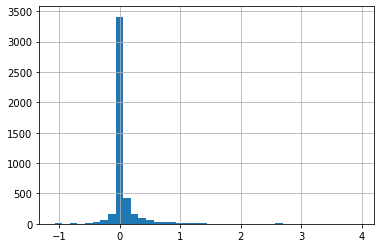

In [87]:
f_sorted[f_sorted['label']=='is_nar']['mean'].hist(bins=40)

In [88]:
f_sorted.describe()

,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
count,7986.000000,8532.000000,7655.000000,7413.000000,8200.000000,8013.000000,8534.000000,7928.000000,8925.000000,7763.000000,11948.000000
mean,0.049711,0.045760,0.050748,0.050783,0.050070,0.042185,0.042285,0.051096,0.042723,0.047274,0.041042
std,0.431831,0.391892,0.414615,0.408902,0.419289,0.405079,0.396841,0.395952,0.370120,0.406227,0.325666
min,-4.679171,-3.648504,-3.412327,-3.077044,-3.613034,-6.269700,-5.090007,-3.194356,-3.308492,-2.806210,-3.071099
25%,-0.005394,-0.004577,-0.006031,-0.006435,-0.004845,-0.005231,-0.005997,-0.007401,-0.005777,-0.005418,-0.006869
50%,0.000014,0.000026,0.000022,0.000024,0.000012,0.000023,0.000009,0.000087,0.000048,0.000015,0.000119
75%,0.014861,0.010022,0.013832,0.017474,0.011674,0.010878,0.011328,0.020557,0.013271,0.013700,0.018069
max,5.277192,5.347836,4.812185,4.246946,5.747408,4.452783,5.410194,4.511246,4.388053,5.430127,4.014263


In [89]:
f_sorted_common=f_sorted.dropna(how='any')
f_sorted_common

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
9,3.653440,not_nar,tfidf_lemma_383,במקום,3.931721,3.487616,3.990134,3.149173,3.258662,2.869554,3.721147,3.413970,2.659896,3.413531
3,4.428958,not_nar,tfidf_char_wb_19476,יכנ,3.980455,3.515382,4.240009,0.224892,4.452783,5.410194,3.275344,3.672658,0.000003,3.320068
12,3.522010,not_nar,tfidf_word_3168,לצחוק,1.891774,2.803900,3.858969,3.724681,2.775803,2.603385,1.676019,2.768400,3.871469,2.949641
45,2.368492,not_nar,tfidf_word_5137,שלומך,2.294110,3.165354,3.644257,2.314632,2.732147,3.340627,2.633043,2.395288,3.169006,2.805696
114,1.600505,not_nar,tfidf_lemma_2717,קושי,2.763106,2.929809,3.528005,3.022151,3.855744,2.763142,2.874485,1.204937,3.185677,2.772756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,-1.779025,not_nar,tfidf_word_3931,משם,-1.412888,-1.489385,-1.489700,-1.282948,-1.110843,-1.339394,-1.635494,-1.458514,-1.849043,-1.484723
7968,-1.888521,not_nar,tfidf_lemma_183,אלו,-2.020239,-3.412327,-1.415099,-2.013707,-2.985565,-1.720732,-1.954451,-1.603356,-1.847837,-2.086183
7981,-2.836742,not_nar,tfidf_char_wb_30927,שיר,-2.102295,-2.323993,-1.551656,-1.290093,-2.654074,-2.601914,-2.226168,-1.630163,-1.681705,-2.089880
7982,-3.049779,not_nar,tfidf_char_wb_6657,עמ,-1.920346,-2.902550,-1.876824,-1.446101,-2.003884,-2.074303,-2.520493,-1.689496,-1.940633,-2.142441


In [90]:
f_sorted

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
6,4.049958,not_nar,tfidf_lemma_364,בישל,4.502008,4.812185,NaN,3.252814,3.639021,NaN,4.260939,3.582914,NaN,4.014263
7986,NaN,is_nar,tfidf_word_773,בקיבוץ,4.356954,3.177902,NaN,3.758851,NaN,NaN,4.511246,NaN,NaN,3.951238
7988,NaN,not_nar,tfidf_word_3428,מהעבר,3.002947,NaN,4.128957,2.057840,4.282197,4.621712,4.366971,4.388053,3.367888,3.777071
59,2.181491,is_nar,tfidf_lemma_648,הולדת,5.347836,3.027451,4.151603,4.077867,4.046792,2.775223,NaN,4.319711,2.871547,3.644391
4,4.338737,not_nar,tfidf_lemma_2260,סודר,3.775087,4.140668,2.191434,4.549525,3.497812,NaN,3.425014,3.181474,NaN,3.637469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,-2.743915,not_nar,tfidf_char_wb_28069,פתי,-2.130129,-2.199627,-1.562644,NaN,-2.202714,NaN,-1.731812,-1.937565,-2.359163,-2.108446
7982,-3.049779,not_nar,tfidf_char_wb_6657,עמ,-1.920346,-2.902550,-1.876824,-1.446101,-2.003884,-2.074303,-2.520493,-1.689496,-1.940633,-2.142441
9765,NaN,not_nar,tfidf_word_4029,מתעסק,-2.100521,NaN,NaN,NaN,NaN,NaN,-2.074453,-2.572354,NaN,-2.249109
7975,-2.338928,not_nar,tfidf_word_4301,סיפור,-2.634415,-2.639944,-1.645373,-1.736079,-3.160137,-2.173461,-2.384897,-2.425341,-2.339666,-2.347824


In [124]:
f_mean=pd.DataFrame()#columns=['is_nar','not_nar'])
f_mean['is_nar']=f_sorted[f_sorted['label']=='is_nar']['mean'].values
f_mean=pd.concat([f_mean,(f_sorted[f_sorted['label']=='not_nar'].reset_index())['mean']],axis=1)
f_mean.rename({'mean':'not_nar'},inplace=True,axis=1)
f_mean

,is_nar,not_nar
0,3.951238,4.014263
1,3.644391,3.777071
2,3.450055,3.637469
3,3.333524,3.413531
4,3.143157,3.320068
...,...,...
7363,NaN,-2.108446
7364,NaN,-2.142441
7365,NaN,-2.249109
7366,NaN,-2.347824


In [132]:
f_mean.describe()

,is_nar,not_nar
count,4580.000000,7368.000000
mean,0.063284,0.027217
std,0.286522,0.347086
min,-1.076382,-3.071099
25%,-0.002571,-0.011595
50%,0.000700,0.000003
75%,0.028489,0.012677
max,3.951238,4.014263


In [3]:
f_sorted

NameError: name 'f_sorted' is not defined

In [161]:
X=f_sorted[f_sorted['label']=='is_nar']['mean'].values.reshape(-1, 1) 
X_n=f_sorted[f_sorted['label']=='not_nar'].loc[::2,'mean'].values.reshape(-1, 1) 


In [162]:
from sklearn.neighbors import KernelDensity
f_common=pd.DataFrame()
f_mean=pd.DataFrame()
f_n_mean=pd.DataFrame()

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
nar_dist=kde.score_samples(X)
f_mean['is_nar']=nar_dist
f_n_mean=pd.DataFrame()
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_n)
not_nar_dist=kde.score_samples(X_n)
f_n_mean['not_nar']=not_nar_dist

<AxesSubplot:>

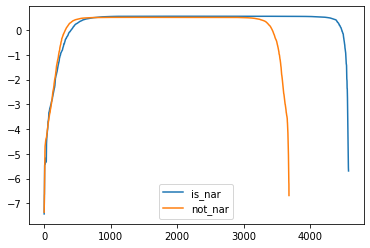

In [163]:
f_common=pd.concat([f_mean,f_n_mean],axis=1)
f_common.plot()

<AxesSubplot:>

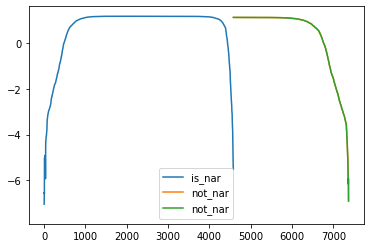

In [158]:
f_common=pd.concat([f_mean,f_n_mean.iloc[::2,]],axis=1)
f_common.plot()

<AxesSubplot:>

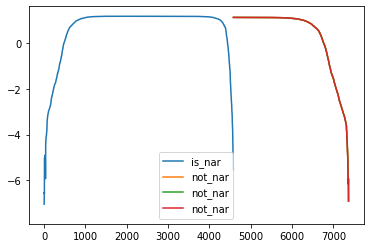

In [156]:
f_mean=pd.DataFrame()
f_mean=pd.concat([f_mean,f_n_mean.iloc[::2,]],axis=1)
f_mean.plot()

<AxesSubplot:ylabel='Density'>

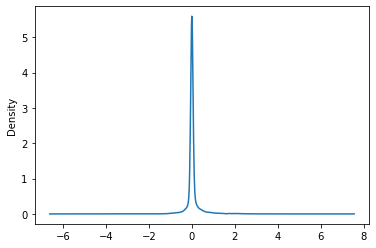

In [148]:
f_sorted['mean'].plot(kind='kde')

In [152]:
common_utils.save_db(f_mean,dir_name,"features_kde",True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/features_kde.csv, 
index True
float_format %.5f


In [130]:
common_utils.save_db(f_sorted[f_sorted['label']=='is_nar']['mean'],dir_name,"features_nar",False)
common_utils.save_db(f_sorted[f_sorted['label']=='is_nar']['mean'],dir_name,"features_not_nar",False)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/features_nar.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/features_not_nar.csv, 
index False
float_format %.5f


In [125]:
common_utils.save_db(f_mean,dir_name,"features_all_mean",True)
f_mean.describe()

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/features_all_mean.csv, 
index True
float_format %.5f


,is_nar,not_nar
count,4580.000000,7368.000000
mean,0.063284,0.027217
std,0.286522,0.347086
min,-1.076382,-3.071099
25%,-0.002571,-0.011595
50%,0.000700,0.000003
75%,0.028489,0.012677
max,3.951238,4.014263


In [93]:
common_utils.save_db(f_sorted['mean'],dir_name,"features_all_mean",True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/features_all_mean.csv, 
index True
float_format %.5f


In [92]:
common_f_rate=f_sorted_common.shape[0]*100/f_sorted.shape[0]
common_f_rate

27.368597254770673

In [16]:
per_90=np.percentile(f_sorted[f_sorted['label']=='is_nar']['mean'],90)
per_90

0.19513321000000017

In [225]:
top_90_perc=f_sorted[(f_sorted['label']=='is_nar')&(f_sorted['mean']>per_90)].copy().reset_index()
top_90_perc

,index,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
0,7986,NaN,is_nar,tfidf_word_773,בקיבוץ,4.356954,3.177902,NaN,3.758851,NaN,NaN,4.511246,NaN,NaN,3.951238
1,59,2.181491,is_nar,tfidf_lemma_648,הולדת,5.347836,3.027451,4.151603,4.077867,4.046792,2.775223,NaN,4.319711,2.871547,3.644391
2,8,3.664036,is_nar,tfidf_lemma_2100,נוראי,3.491918,NaN,NaN,3.568249,NaN,NaN,3.346443,3.529020,3.100665,3.450055
3,15,3.182356,is_nar,tfidf_lemma_2232,נתפס,3.382293,3.334750,NaN,3.908944,NaN,3.758238,3.528757,2.788097,2.784761,3.333524
4,7,3.986020,is_nar,tfidf_word_2811,להיפגש,NaN,3.637349,NaN,NaN,NaN,NaN,2.349026,2.600234,NaN,3.143157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1059,0.114184,is_nar,tfidf_word_2461,יכולתי,0.267278,0.159696,0.067960,0.218405,0.300438,0.300547,0.226951,0.329984,0.019585,0.200503
454,1654,0.029051,is_nar,tfidf_lemma_300,בדק,0.035590,0.000003,0.110753,0.385632,0.336177,0.393655,0.276031,0.159483,0.260501,0.198688
455,2123,0.011387,is_nar,tfidf_lemma_1844,מיני,0.000706,0.086039,0.575218,0.229223,0.023625,0.109712,0.199335,0.005396,0.734438,0.197508
456,472,0.517306,is_nar,tfidf_lemma_1768,מורה,NaN,0.097241,NaN,0.449325,0.003920,0.459609,0.014343,0.003609,0.025379,0.196342


In [226]:
top_90_perc[~top_90_perc['attr'].str.contains('tfidf')]

,index,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
224,492,0.494485,is_nar,+1:f_per_2,NaN,0.225700,0.493356,0.624471,0.698242,0.151541,0.420747,0.493007,0.526166,0.370993,0.449871
288,622,0.354056,is_nar,-1:POSTAG_INTJ,NaN,0.212442,0.419281,0.554385,0.327485,0.575452,0.296185,0.196823,0.337368,0.307727,0.358120
328,893,0.171407,is_nar,f_tense_PAST,NaN,0.330419,0.318619,0.299972,0.405837,0.309994,0.283380,0.373985,0.271124,0.290090,0.305483
392,973,0.141005,is_nar,sent_len,NaN,0.291912,0.135249,0.618963,0.034110,0.271340,0.425339,0.090437,0.440255,0.042994,0.249160
432,832,0.204722,is_nar,is_client,NaN,0.182853,0.170636,0.253317,0.307226,0.140829,0.330922,0.199017,0.191835,0.209229,0.219059


In [218]:
top100 = f_sorted[(f_sorted['label']=='is_nar')].head(100).copy()

In [219]:
top_90_perc[~top_90_perc['attr'].str.contains('tfidf')]

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
492,0.494485,is_nar,+1:f_per_2,NaN,0.225700,0.493356,0.624471,0.698242,0.151541,0.420747,0.493007,0.526166,0.370993,0.449871
622,0.354056,is_nar,-1:POSTAG_INTJ,NaN,0.212442,0.419281,0.554385,0.327485,0.575452,0.296185,0.196823,0.337368,0.307727,0.358120
893,0.171407,is_nar,f_tense_PAST,NaN,0.330419,0.318619,0.299972,0.405837,0.309994,0.283380,0.373985,0.271124,0.290090,0.305483
973,0.141005,is_nar,sent_len,NaN,0.291912,0.135249,0.618963,0.034110,0.271340,0.425339,0.090437,0.440255,0.042994,0.249160
832,0.204722,is_nar,is_client,NaN,0.182853,0.170636,0.253317,0.307226,0.140829,0.330922,0.199017,0.191835,0.209229,0.219059


In [220]:
feature_pos_for_latex[~feature_pos_for_latex['attr'].str.contains('tfidf')]['attr'].tolist()

['+1:f_per_2', '-1:POSTAG_INTJ', 'f_tense_PAST', 'sent_len', 'is_client']

In [221]:
feature_pos_for_latex=top_90_perc[['attr','mean']]
feature_pos_for_latex.reset_index(inplace=True,drop=True)
feature_pos_for_latex

,attr,mean
0,tfidf_word_773,3.951238
1,tfidf_lemma_648,3.644391
2,tfidf_lemma_2100,3.450055
3,tfidf_lemma_2232,3.333524
4,tfidf_word_2811,3.143157
...,...,...
453,tfidf_word_2461,0.200503
454,tfidf_lemma_300,0.198688
455,tfidf_lemma_1844,0.197508
456,tfidf_lemma_1768,0.196342


In [73]:
lowest_pos=feature_pos_for_latex.iloc[-1]['mean']
lowest_pos

0.1955257

In [36]:
imp.reload(common_utils)
common_utils.save_db(feature_pos_for_latex,dir_name,"feature_pos_for_latex",True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/feature_pos_for_latex.csv, 
index True
float_format %.5f


In [76]:
per_5=np.percentile(f_sorted[f_sorted['label']=='is_nar']['mean'],5)
print(per_5)
# feature_neg_for_latex= f_sorted[(f_sorted['label']=='is_nar')&(f_sorted['mean']<per_5)][['attr','mean']].copy()
feature_neg_for_latex= f_sorted[(f_sorted['label']=='is_nar')&(f_sorted['mean']<(-1*lowest_pos))][['attr','mean']].copy()

feature_neg_for_latex.sort_values(by='mean',inplace=True)
feature_neg_for_latex.reset_index(inplace=True,drop=True)
F
common_utils.save_db(feature_neg_for_latex,dir_name,"feature_neg_for_latex0.5",True)

-0.08824356055555545
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/feature_neg_for_latex0.5.csv, 
index True
float_format %.5f


In [85]:
feature_neg_no_attr=feature_neg_for_latex[['mean']]
feature_neg_no_attr

,mean
0,-1.076382
1,-1.066789
2,-1.039545
3,-1.006314
4,-0.993223
...,...
107,-0.203140
108,-0.201808
109,-0.199608
110,-0.196951


In [86]:
common_utils.save_db(feature_neg_no_attr,dir_name,"feature_neg_no_attr_for_latex0.5",True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/feature_neg_no_attr_for_latex0.5.csv, 
index True
float_format %.5f


In [77]:
feature_neg_for_latex[~feature_neg_for_latex['attr'].str.contains('tfidf')][['mean','attr']]

,mean,attr
7,-0.812640,+3:POSTAG_CDT
11,-0.703004,-2:f_suf_per_2.0
14,-0.617478,+1:f_suf_num_P
24,-0.482253,+3:f_tense_IMPERATIVE
36,-0.397183,+1:POSTAG_CDT
42,-0.361848,f_per_2
56,-0.313931,+3:POSTAG_CD
58,-0.308996,+1:POSTAG_COP
70,-0.278270,-1:f_suf_per_2.0
95,-0.221846,+2:f_tense_IMPERATIVE


In [78]:
neg_index_list=(feature_neg_for_latex[~feature_neg_for_latex['attr'].str.contains('tfidf')].index.tolist())
print(neg_index_list)

[7, 11, 14, 24, 36, 42, 56, 58, 70, 95, 109]


In [127]:
len(neg_index_list)*100/feature_neg_for_latex.shape[0]

9.821428571428571

In [187]:
neg_list=feature_neg_for_latex[~feature_neg_for_latex['attr'].str.contains('tfidf')]['attr'].tolist()
print(neg_list)
neg_y_tick=feature_neg_for_latex[~feature_neg_for_latex['attr'].str.contains('tfidf')]['mean'].tolist()
print(neg_y_tick)
ticks=['{{{}\\{}}}'.format(neg_index_list[i],item) for i,item in enumerate(neg_list)]
print(ticks)

['+3:POSTAG_CDT', '-2:f_suf_per_2.0', '+1:f_suf_num_P', '+3:f_tense_IMPERATIVE', '+1:POSTAG_CDT', 'f_per_2', '+3:POSTAG_CD', '+1:POSTAG_COP', '-1:f_suf_per_2.0', '+2:f_tense_IMPERATIVE', '+3:POSTAG_DTT']
[-0.8126399, -0.7030035714285715, -0.6174776, -0.4822532, -0.3971829, -0.3618482, -0.3139308, -0.3089964, -0.27827, -0.2218461, -0.1996079999999999]
['{7\\+3:POSTAG_CDT}', '{11\\-2:f_suf_per_2.0}', '{14\\+1:f_suf_num_P}', '{24\\+3:f_tense_IMPERATIVE}', '{36\\+1:POSTAG_CDT}', '{42\\f_per_2}', '{56\\+3:POSTAG_CD}', '{58\\+1:POSTAG_COP}', '{70\\-1:f_suf_per_2.0}', '{95\\+2:f_tense_IMPERATIVE}', '{109\\+3:POSTAG_DTT}']


In [437]:
f_sorted[f_sorted['label']=='is_nar'].head(15)[['attr','string','mean']]#.to_csv(sep='&',line_terminator='\\')

,attr,string,mean
7986,tfidf_word_773,בקיבוץ,3.951238
59,tfidf_lemma_648,הולדת,3.644391
8,tfidf_lemma_2100,נוראי,3.450055
15,tfidf_lemma_2232,נתפס,3.333524
7,tfidf_word_2811,להיפגש,3.143157
18,tfidf_word_4847,שאל,2.916445
21,tfidf_lemma_799,העמיד,2.746420
46,tfidf_lemma_366,בכה,2.713618
33,tfidf_lemma_2539,פייסבוק,2.682191
73,tfidf_lemma_3155,תל,2.673249


In [228]:
f_sorted[f_sorted['label']=='is_nar'].tail()

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
7927,-1.153412,is_nar,tfidf_word_812,בשביל,-0.699942,-0.964182,-0.896178,-1.285043,-1.062794,-1.165837,-0.901554,-0.588320,-1.214968,-0.993223
7957,-1.589875,is_nar,tfidf_word_2521,ישיבה,-0.153329,-1.479857,-1.139501,-1.371156,NaN,-0.698620,NaN,-0.147986,-1.470185,-1.006314
7948,-1.355233,is_nar,tfidf_lemma_1539,כלל,-1.098887,-0.937528,-0.946752,-1.139076,-1.309992,-0.824218,-1.096991,-0.937184,-0.749585,-1.039545
7953,-1.477783,is_nar,tfidf_char_wb_7336,ש,-0.222835,-1.313684,-0.866572,-1.353864,-0.866780,-1.219697,-1.161716,-1.083857,-1.101103,-1.066789
7961,-1.672782,is_nar,tfidf_char_wb_8866,אות,-0.852832,-1.805877,-0.519072,-0.825790,-1.897384,-0.566886,-0.702681,-0.653658,-1.266862,-1.076382


In [93]:
f_sorted[(~f_sorted['attr'].str.contains('tfidf'))&(f_sorted['label']=='not_nar')&(f_sorted['mean']>0.19)]['attr']

604         -2:f_suf_per_2.0
182            +3:POSTAG_CDT
196           +1:f_suf_num_P
186    +3:f_tense_IMPERATIVE
628            +1:POSTAG_CDT
523            f_suf_per_2.0
580                  f_per_2
783             +3:POSTAG_CD
845            +1:POSTAG_COP
787    +2:f_tense_IMPERATIVE
515            +3:POSTAG_DTT
853              is_question
558            +2:POSTAG_CDT
Name: attr, dtype: object

In [94]:
f_sorted[(~f_sorted['attr'].str.contains('tfidf'))&(f_sorted['label']=='not_nar')&(f_sorted['mean']<-0.19)]['attr']

7444         is_client
7309          sent_len
7390      f_tense_PAST
9748     +2:POSTAG_JJT
7619    -1:POSTAG_INTJ
7726        +1:f_per_2
6283     +3:POSTAG_JJT
Name: attr, dtype: object

In [428]:
features_plot=pd.DataFrame()
for attr_type in ['char','lemma','word']:
    for label in ['is_nar','not_nar']:
        slice_df=f_sorted[(f_sorted['label'] == label)&(f_sorted['attr'].str.contains(attr_type))].head(15)
        features_plot['w+{}_{}'.format(attr_type,label)]=slice_df['mean'].tolist()
        features_plot['str+{}_{}'.format(attr_type,label)]=slice_df['string'].tolist()
        slice_df=f_sorted[(f_sorted['label'] == label)&(f_sorted['attr'].str.contains(attr_type))].tail(15)
        features_plot['w-{}_{}'.format(attr_type,label)]=slice_df['mean'].tolist()
        features_plot['str-{}_{}'.format(attr_type,label)]=slice_df['string'].tolist()

In [429]:
features_plot

,w+char_is_nar,str+char_is_nar,w-char_is_nar,str-char_is_nar,w+char_not_nar,str+char_not_nar,w-char_not_nar,str-char_not_nar,w+lemma_is_nar,str+lemma_is_nar,...,w-lemma_not_nar,str-lemma_not_nar,w+word_is_nar,str+word_is_nar,w-word_is_nar,str-word_is_nar,w+word_not_nar,str+word_not_nar,w-word_not_nar,str-word_not_nar
0,2.371018,פתי,-0.152784,ייה,3.320068,יכנ,-0.922533,בע,3.644391,הולדת,...,-1.124111,איכל,3.951238,בקיבוץ,-0.362443,זוכרת,3.777071,מהעבר,-1.059062,שניה
1,2.089880,שיר,-0.166701,יה,2.245246,המט,-0.923356,יר,3.450055,נוראי,...,-1.158556,ארגן,3.143157,להיפגש,-0.384244,עלי,3.109631,ולהבין,-1.126012,כשיש
2,2.089134,פתי,-0.169689,שהיי,1.501759,שימו,-0.944134,לט,3.333524,נתפס,...,-1.168459,בגד,2.916445,שאל,-0.402696,הדברים,3.069731,תסביר,-1.135862,להשתחרר
3,1.934010,עמ,-0.188879,שהיי,1.440822,שחו,-0.948334,זית,2.746420,העמיד,...,-1.206274,תחילה,2.609060,ביקשתי,-0.410916,ואיך,2.949641,לצחוק,-1.145922,ואומר
4,1.375353,זרתי,-0.189164,ייה,1.137568,שניי,-1.098922,שינ,2.713618,בכה,...,-1.234316,דפק,2.599244,יושבים,-0.412382,ואם,2.805696,שלומך,-1.213463,ולעשות
5,1.375353,זרתי,-0.191075,בת,1.076382,אות,-1.103512,ידו,2.682191,פייסבוק,...,-1.235614,מצחיק,2.046953,מספרת,-0.445489,רגע,2.695400,לסיים,-1.237836,קורא
6,1.100383,ידו,-0.229338,הה,1.066789,ש,-1.223399,טן,2.673249,תל,...,-1.270801,חלום,2.008715,פעולה,-0.514592,חושבת,2.623077,שאמרת,-1.320796,מעצמי
7,1.098922,שינ,-0.255138,נח,1.061344,הבא,-1.319153,יתר,2.626927,ניהול,...,-1.336288,בהחלט,1.989356,והרגשתי,-0.515200,אמרת,2.514313,ואחר,-1.346833,גברי
8,1.084005,טן,-0.268300,אה,0.982160,גשת,-1.381643,גים,2.600652,יישב,...,-1.370865,פעולה,1.849397,עלה,-0.515957,אנחנו,2.510723,מחפש,-1.376885,לגעת
9,0.970352,טרי,-0.307688,אמרת,0.974010,בינ,-1.697340,מסי,2.534516,כרטיס,...,-1.420754,געת,1.741427,תקשיבי,-0.555031,בת,2.449704,הגבולות,-1.484723,משם


In [430]:
common_utils.save_db(features_plot,dir_name,"most.+.-.15.features")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/most.+.-.15.features.csv,  index False


In [1]:
f_sorted[f_sorted['label']=='is_nar'].shape[0]

NameError: name 'f_sorted' is not defined

### Non-narrative features

<AxesSubplot:ylabel='Density'>

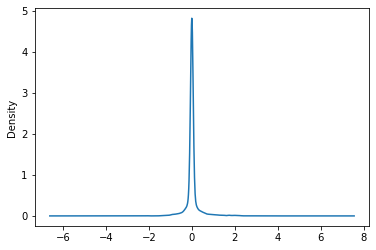

In [95]:
f_sorted_not_nar=f_sorted[(f_sorted['label']=='not_nar')][['mean','attr']].copy()
f_sorted_not_nar['mean'].plot(kind='kde')

In [96]:
f_sorted_not_nar

,mean,attr
6,4.014263,tfidf_lemma_364
7988,3.777071,tfidf_word_3428
4,3.637469,tfidf_lemma_2260
9,3.413531,tfidf_lemma_383
3,3.320068,tfidf_char_wb_19476
...,...,...
7979,-2.108446,tfidf_char_wb_28069
7982,-2.142441,tfidf_char_wb_6657
9765,-2.249109,tfidf_word_4029
7975,-2.347824,tfidf_word_4301


In [130]:
top_not_nar=f_sorted_not_nar[f_sorted_not_nar['mean']>0.19].reset_index().copy()

In [131]:
top_not_nar[~top_not_nar['attr'].str.contains("tf")]

,index,mean,attr
179,604,0.935371,-2:f_suf_per_2.0
209,182,0.812640,+3:POSTAG_CDT
275,196,0.617478,+1:f_suf_num_P
357,186,0.482253,+3:f_tense_IMPERATIVE
428,628,0.397183,+1:POSTAG_CDT
459,523,0.364243,f_suf_per_2.0
463,580,0.361848,f_per_2
502,783,0.313931,+3:POSTAG_CD
507,845,0.308996,+1:POSTAG_COP
626,787,0.221846,+2:f_tense_IMPERATIVE


In [132]:
top_not_nar.describe()

,index,mean
count,683.000000,683.000000
mean,2661.890190,0.740762
std,3674.921272,0.623496
min,0.000000,0.190533
25%,238.000000,0.303744
50%,632.000000,0.506459
75%,4033.500000,0.956697
max,11863.000000,4.014263


In [134]:
low_not_nar=f_sorted_not_nar[f_sorted_not_nar['mean']<-0.19].sort_values(by='mean').reset_index().copy()

In [135]:
low_not_nar.describe()

,index,mean
count,553.000000,553.000000
mean,7886.301989,-0.538479
std,1136.288985,0.376677
min,4125.000000,-3.071099
25%,7498.000000,-0.690866
50%,7755.000000,-0.411307
75%,7925.000000,-0.282406
max,11947.000000,-0.190142


In [136]:
low_not_nar[~low_not_nar['attr'].str.contains("tf")]

,index,mean,attr
156,6283,-0.640221,+3:POSTAG_JJT
246,7726,-0.449871,+1:f_per_2
320,7619,-0.358120,-1:POSTAG_INTJ
328,9748,-0.345956,+2:POSTAG_JJT
372,7390,-0.305483,f_tense_PAST
460,7309,-0.249160,sent_len
506,7444,-0.219059,is_client


In [138]:
pos_idx=top_not_nar[~top_not_nar['attr'].str.contains('tfidf')].index.tolist()
pos_list=top_not_nar[~top_not_nar['attr'].str.contains('tfidf')]['attr'].tolist()
pos_y_tick=top_not_nar[~top_not_nar['attr'].str.contains('tfidf')]['mean'].tolist()
pos_ticks=['{} {}'.format(pos_idx[i],item) for i,item in enumerate(pos_list)]
# print(pos_idx,'\n',pos_ticks)
print("Not nar positive")
pos_ticks

Not nar positive


['179 -2:f_suf_per_2.0',
 '209 +3:POSTAG_CDT',
 '275 +1:f_suf_num_P',
 '357 +3:f_tense_IMPERATIVE',
 '428 +1:POSTAG_CDT',
 '459 f_suf_per_2.0',
 '463 f_per_2',
 '502 +3:POSTAG_CD',
 '507 +1:POSTAG_COP',
 '626 +2:f_tense_IMPERATIVE',
 '664 +3:POSTAG_DTT',
 '671 is_question',
 '681 +2:POSTAG_CDT']

In [123]:
pos_ticks

['179 -2:f_suf_per_2.0',
 '209 +3:POSTAG_CDT',
 '275 +1:f_suf_num_P',
 '357 +3:f_tense_IMPERATIVE',
 '428 +1:POSTAG_CDT',
 '459 f_suf_per_2.0',
 '463 f_per_2',
 '502 +3:POSTAG_CD',
 '507 +1:POSTAG_COP',
 '626 +2:f_tense_IMPERATIVE',
 '664 +3:POSTAG_DTT',
 '671 is_question',
 '681 +2:POSTAG_CDT']

In [212]:
len(pos_idx),len(neg_idx)

(13, 7)

In [210]:
len(pos_idx)*100/top_not_nar.shape[0]

1.9033674963396778

In [211]:
len(neg_idx)*100/low_not_nar.shape[0]

1.2658227848101267

In [126]:
low_not_nar

,index,mean,attr
0,7985,-3.071099,tfidf_char_wb_16372
1,7975,-2.347824,tfidf_word_4301
2,9765,-2.249109,tfidf_word_4029
3,7982,-2.142441,tfidf_char_wb_6657
4,7979,-2.108446,tfidf_char_wb_28069
...,...,...,...
548,6684,-0.193451,tfidf_lemma_2011
549,11440,-0.193050,tfidf_word_4797
550,7346,-0.190763,tfidf_char_wb_28824
551,10258,-0.190142,tfidf_char_wb_30279


In [140]:
low_not_nar.iloc[156,:]

index             6283
mean         -0.640221
attr     +3:POSTAG_JJT
Name: 156, dtype: object

In [143]:
low_not_nar.shape[0]

553

In [141]:
low_not_nar[~low_not_nar['attr'].str.contains('tfidf')]

,index,mean,attr
156,6283,-0.640221,+3:POSTAG_JJT
246,7726,-0.449871,+1:f_per_2
320,7619,-0.358120,-1:POSTAG_INTJ
328,9748,-0.345956,+2:POSTAG_JJT
372,7390,-0.305483,f_tense_PAST
460,7309,-0.249160,sent_len
506,7444,-0.219059,is_client


In [139]:
neg_idx=low_not_nar[~low_not_nar['attr'].str.contains('tfidf')].index.tolist()
neg_list=low_not_nar[~low_not_nar['attr'].str.contains('tfidf')]['attr'].tolist()
neg_y_tick=low_not_nar[~low_not_nar['attr'].str.contains('tfidf')]['mean'].tolist()
neg_ticks=['{}:{}'.format(neg_idx[i],item) for i,item in enumerate(neg_list)]
# print(neg_idx,neg_ticks)
print("Not nar negative")
neg_ticks

Not nar negative


['156:+3:POSTAG_JJT',
 '246:+1:f_per_2',
 '320:-1:POSTAG_INTJ',
 '328:+2:POSTAG_JJT',
 '372:f_tense_PAST',
 '460:sent_len',
 '506:is_client']

In [142]:
neg_idx

[156, 246, 320, 328, 372, 460, 506]

In [217]:
common_utils.save_db(low_not_nar[['mean']],dir_name,"feature_neg_not_nar",True)
common_utils.save_db(top_not_nar[['mean']],dir_name,"feature_pos_not_nar",True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/feature_neg_not_nar.csv, 
index True
float_format %.5f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/feature_pos_not_nar.csv, 
index True
float_format %.5f


## Narrative features

In [155]:
top_nar=f_sorted[(f_sorted['mean']>=0.19)&(f_sorted['label']=='is_nar')].reset_index().copy()
low_nar=f_sorted[(f_sorted['mean']<=-0.19)&(f_sorted['label']=='is_nar')].sort_values(by='mean').reset_index().copy()

In [158]:
top_nar.shape[0],low_nar.shape[0]

(464, 115)

In [151]:
low_nar

,index,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
0,7961,-1.672782,is_nar,tfidf_char_wb_8866,אות,-0.852832,-1.805877,-0.519072,-0.825790,-1.897384,-0.566886,-0.702681,-0.653658,-1.266862,-1.076382
1,7953,-1.477783,is_nar,tfidf_char_wb_7336,ש,-0.222835,-1.313684,-0.866572,-1.353864,-0.866780,-1.219697,-1.161716,-1.083857,-1.101103,-1.066789
2,7948,-1.355233,is_nar,tfidf_lemma_1539,כלל,-1.098887,-0.937528,-0.946752,-1.139076,-1.309992,-0.824218,-1.096991,-0.937184,-0.749585,-1.039545
3,7957,-1.589875,is_nar,tfidf_word_2521,ישיבה,-0.153329,-1.479857,-1.139501,-1.371156,NaN,-0.698620,NaN,-0.147986,-1.470185,-1.006314
4,7927,-1.153412,is_nar,tfidf_word_812,בשביל,-0.699942,-0.964182,-0.896178,-1.285043,-1.062794,-1.165837,-0.901554,-0.588320,-1.214968,-0.993223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,7445,-0.205677,is_nar,tfidf_word_268,אפשר,-0.204567,-0.150147,-0.238609,-0.060481,-0.210273,-0.270023,-0.205383,-0.344293,-0.080060,-0.196951
111,7517,-0.256465,is_nar,tfidf_lemma_605,הגיב,-0.279209,-0.106750,-0.397346,NaN,-0.000001,-0.180217,-0.208486,NaN,-0.144511,-0.196623
112,7428,-0.191666,is_nar,is_question,NaN,-0.149477,-0.273804,-0.206140,-0.081170,-0.088033,-0.173850,-0.188657,-0.330429,-0.261269,-0.194449
113,6235,-0.009793,is_nar,tfidf_char_wb_1276,בת,-0.222609,-0.330290,-0.388215,-0.295400,-0.093279,-0.123755,-0.215985,-0.167817,-0.063608,-0.191075


In [156]:
pos_idx=top_nar[~top_nar['attr'].str.contains('tfidf')].index.tolist()
pos_list=top_nar[~top_nar['attr'].str.contains('tfidf')]['attr'].tolist()
pos_y_tick=top_nar[~top_nar['attr'].str.contains('tfidf')]['mean'].tolist()
pos_ticks=['{} {}'.format(pos_idx[i],item) for i,item in enumerate(pos_list)]
# print(pos_idx,'\n',pos_ticks)
print("Nar positive")
pos_ticks

Nar positive


['224 +1:f_per_2',
 '288 -1:POSTAG_INTJ',
 '328 f_tense_PAST',
 '392 sent_len',
 '432 is_client']

In [157]:
neg_idx=low_nar[~low_nar['attr'].str.contains('tfidf')].index.tolist()
neg_list=low_nar[~low_nar['attr'].str.contains('tfidf')]['attr'].tolist()
neg_y_tick=low_nar[~low_nar['attr'].str.contains('tfidf')]['mean'].tolist()
neg_ticks=['{}:{}'.format(neg_idx[i],item) for i,item in enumerate(neg_list)]
# print(neg_idx,neg_ticks)
print("Nar negative")
neg_ticks

Nar negative


['7:+3:POSTAG_CDT',
 '11:-2:f_suf_per_2.0',
 '14:+1:f_suf_num_P',
 '24:+3:f_tense_IMPERATIVE',
 '36:+1:POSTAG_CDT',
 '42:f_per_2',
 '56:+3:POSTAG_CD',
 '58:+1:POSTAG_COP',
 '70:-1:f_suf_per_2.0',
 '95:+2:f_tense_IMPERATIVE',
 '109:+3:POSTAG_DTT',
 '112:is_question',
 '114:+2:POSTAG_CDT']

## Open all prediction to build a curve

In [5]:
all_pred=common_utils.load_db(dir_name,"bert.crf.svc.new.76")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.crf.svc.new.76.csv,  index False


In [6]:
all_pred

,bert_group,bert_split,bert_predicted,bert_true,bert_proba_0,bert_proba_1,bert_sent_idx,bert_par,crf_group,crf_par,...,crf_proba_0,crf_proba_1,crf_sent_idx,ens_par,ens_predicted,ens_group,ens_split,ens_true,ens_par_y,ens_sent_idx
0,4,0,0,0,0.735761,0.264239,0,0,4,0,...,0.928988,0.071012,0,0,0,4,0,0,0,0
1,4,0,0,0,0.809237,0.190763,1,1,4,1,...,0.948798,0.051202,1,1,0,4,0,0,1,1
2,4,0,0,0,0.830174,0.169826,2,2,4,2,...,0.963766,0.036234,2,2,0,4,0,0,2,2
3,4,0,0,0,0.627892,0.372108,3,3,4,3,...,0.891811,0.108189,3,3,0,4,0,0,3,3
4,4,0,0,0,0.656868,0.343132,4,3,4,3,...,0.769472,0.230528,4,3,0,4,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38776,79,9,0,0,0.795311,0.204689,254,171,79,171,...,0.972802,0.027198,254,171,0,79,9,0,171,254
38777,79,9,0,0,0.860838,0.139162,255,172,79,172,...,0.980269,0.019731,255,172,0,79,9,0,172,255
38778,79,9,0,0,0.875573,0.124427,256,172,79,172,...,0.989618,0.010382,256,172,0,79,9,0,172,256
38779,79,9,0,0,0.865315,0.134685,257,172,79,172,...,0.989894,0.010106,257,172,0,79,9,0,172,257


In [17]:
all_pred.loc[:,all_pred.columns.str.contains("crf")]

,crf_group,crf_par,crf_split,crf_predicted,crf_true,crf_proba_0,crf_proba_1,crf_sent_idx
0,4,0,0,not_nar,not_nar,0.928988,0.071012,0
1,4,1,0,not_nar,not_nar,0.948798,0.051202,1
2,4,2,0,not_nar,not_nar,0.963766,0.036234,2
3,4,3,0,not_nar,not_nar,0.891811,0.108189,3
4,4,3,0,not_nar,not_nar,0.769472,0.230528,4
...,...,...,...,...,...,...,...,...
38776,79,171,9,not_nar,not_nar,0.972802,0.027198,254
38777,79,172,9,not_nar,not_nar,0.980269,0.019731,255
38778,79,172,9,not_nar,not_nar,0.989618,0.010382,256
38779,79,172,9,not_nar,not_nar,0.989894,0.010106,257


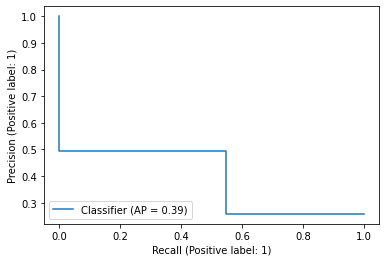

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
y_true=all_pred['bert_true'].tolist()
y_pred=all_pred['bert_predicted'].tolist()
y_scores=all_pred['bert_proba_1'].tolist()
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
PrecisionRecallDisplay.from_predictions(y_true, y_pred)

In [18]:
y_true=all_pred['crf_true'].tolist()
y_pred=all_pred['crf_predicted'].tolist()
y_scores=all_pred['crf_proba_1'].tolist()
precision, recall, thresholds = precision_recall_curve(y_true, y_scores,pos_label='is_nar')
# PrecisionRecallDisplay.from_predictions(y_true, y_pred,pos_label='is_nar')

## open f1 per fold

In [19]:
f1_per_fold=common_utils.load_db(dir_name,"bert.cfg.svc.per.fold_f1.pure")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/bert.cfg.svc.per.fold_f1.pure.csv,  index False


In [22]:
f1_per_fold.describe()

,Unnamed: 0,bert_1,bert_0,crf_1,crf_0,ens_1,ens_0
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,0.515761,0.820226,0.544544,0.859127,0.549619,0.873889
std,3.02765,0.049178,0.029940,0.052937,0.034338,0.044612,0.025348
min,1.00000,0.424353,0.779333,0.467223,0.790179,0.495970,0.829172
25%,3.25000,0.488961,0.794402,0.518289,0.845137,0.518559,0.860593
50%,5.50000,0.528029,0.818381,0.538803,0.856083,0.545441,0.871111
75%,7.75000,0.534588,0.841693,0.549749,0.886195,0.554987,0.895823
max,10.00000,0.602669,0.866980,0.640000,0.899508,0.648036,0.906662


## See averaged F1 per doc

In [ ]:
all_pred.

In [186]:
scores={}
scores_dict={}
for t in ['bert','crf','ens']:
    scores[t], scores_dict[t], _, _ = model_utils.get_report_by_unit(all_pred,t,"group")

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [195]:
doc_score_db=pd.DataFrame()
for est_name,est_value in scores_dict.items():
    for doc_idx,doc in est_value.items():
        doc_score_db.loc[doc_idx,est_name]=doc['weighted avg']['f1-score']

In [225]:
doc_score_db[(doc_score_db['bert']<doc_score_db['crf'])&(doc_score_db['crf']<doc_score_db['ens'])]

,bert,crf,ens
4,0.733926,0.758367,0.763277
14,0.844092,0.880037,0.899217
15,0.901196,0.932106,0.961438
5,0.685553,0.808168,0.833422
34,0.776057,0.802973,0.829294
37,0.914533,0.933418,0.966667
62,0.694185,0.714470,0.747788
73,0.833179,0.855156,0.901207
7,0.744832,0.767830,0.797920
54,0.867507,0.868267,0.883958


In [243]:
doc_score_db

,bert,crf,ens,doc_index
4,0.733926,0.758367,0.763277,4
14,0.844092,0.880037,0.899217,14
15,0.901196,0.932106,0.961438,15
18,0.740223,0.675522,0.665444,18
29,0.680680,0.734554,0.711032,29
...,...,...,...,...
52,0.762185,0.842255,0.856063,52
60,0.690619,0.721389,0.779680,60
64,0.804693,0.849113,0.874555,64
78,0.795546,0.776397,0.873618,78


In [242]:
doc_score_db['doc_index']=doc_score_db.index

In [226]:
nar_db_c=common_utils.load_db(dir_name,"nar.count.per.doc")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/nar.count.per.doc.csv,  index False


In [235]:
nar_db_c[nar_db_c['doc_idx']==79]

,doc_idx,nar_count
78,79.0,13.0


In [246]:
score_count_db=doc_score_db.merge(nar_db_c,left_on='doc_index',right_on='doc_idx',validate='one_to_one')

In [247]:
score_count_db

,bert,crf,ens,doc_index,doc_idx,nar_count
0,0.733926,0.758367,0.763277,4,4.0,6.0
1,0.844092,0.880037,0.899217,14,14.0,4.0
2,0.901196,0.932106,0.961438,15,15.0,2.0
3,0.740223,0.675522,0.665444,18,18.0,12.0
4,0.680680,0.734554,0.711032,29,29.0,17.0
...,...,...,...,...,...,...
75,0.762185,0.842255,0.856063,52,52.0,11.0
76,0.690619,0.721389,0.779680,60,60.0,6.0
77,0.804693,0.849113,0.874555,64,64.0,6.0
78,0.795546,0.776397,0.873618,78,78.0,6.0


In [260]:
score_count_db.query('doc_index==4')

,bert,crf,ens,doc_index,doc_idx,nar_count
0,0.733926,0.758367,0.763277,4,4.0,6.0


<AxesSubplot:>

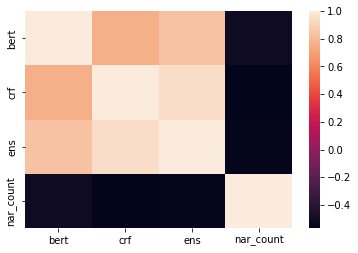

In [248]:
import seaborn as sns

sns.heatmap(score_count_db[['bert','crf','ens','nar_count']].corr())

In [197]:
doc_score_db.describe()

,bert,crf,ens
count,80.000000,80.000000,80.000000
mean,0.757368,0.781009,0.796670
std,0.076107,0.090899,0.089488
min,0.576079,0.516630,0.569673
25%,0.710388,0.728606,0.747536
50%,0.749676,0.787504,0.807794
75%,0.814476,0.841919,0.849060
max,0.931563,0.983734,0.982675


<AxesSubplot:ylabel='Density'>

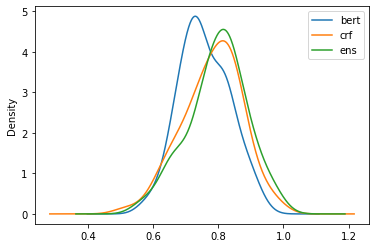

In [222]:
doc_score_db.plot(kind='kde')

In [183]:
doc_score_db.iloc[63,:]

bert    0.677550
crf     0.831444
ens     0.798787
Name: 63, dtype: float64

In [201]:
doc_to_use=(doc_score_db['crf'] - doc_score_db['bert']).idxmax()

In [220]:
doc_score_db['bert'].idxmax()

55

In [221]:
doc_score_db.iloc[55,:]

bert    0.777771
crf     0.788380
ens     0.798970
Name: 74, dtype: float64

In [244]:
common_utils.save_db(doc_score_db,dir_name,"f1_per_doc")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/f1_per_doc.csv, 
index False
float_format %.5f


In [218]:
all_pred.groupby('bert_group').size().reset_index(name='size').iloc[67,:]

bert_group     68
size          899
Name: 67, dtype: int64

In [256]:
doc_to_use=4

In [257]:
imp.reload(classes)
wd = classes.WindowDiff()
start={}
end={}
start['true'], end['true'] =  wd.get_boundaries_indices(all_pred.query('bert_group ==@doc_to_use')['bert_true'].tolist())
start['crf'], end['crf'] = wd.get_boundaries_indices(all_pred.query('crf_group ==@doc_to_use')['crf_predicted'].tolist())
start['bert'], end['bert'] = wd.get_boundaries_indices(all_pred.query('bert_group ==@doc_to_use')['bert_predicted'].tolist())
start['ens'], end['ens'] = wd.get_boundaries_indices(all_pred.query('ens_group ==@doc_to_use')['ens_predicted'].tolist())

WindowDiff init called


In [258]:
start['true'],start['crf'],start['bert']

([5, 17, 174, 237, 280, 403],
 [5, 45, 180, 195, 225, 270, 390],
 [5,
  13,
  36,
  38,
  45,
  47,
  50,
  52,
  56,
  67,
  69,
  80,
  87,
  89,
  91,
  97,
  99,
  112,
  117,
  123,
  161,
  168,
  170,
  174,
  180,
  188,
  195,
  207,
  217,
  224,
  229,
  231,
  237,
  239,
  254,
  258,
  277,
  289,
  291,
  389,
  397,
  400,
  403,
  409,
  451,
  460])

In [259]:
bound_db={}
for t in ['true','bert','crf','ens']:
    bound_db[t]=pd.DataFrame()
    bound_db[t]['start']=start[t]
    bound_db[t]['end']=end[t]
    common_utils.save_db(bound_db[t],dir_name,'boundary_{}_{}'.format(doc_to_use,t))

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/boundary_4_true.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/boundary_4_bert.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/boundary_4_crf.csv, 
index False
float_format %.5f
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/boundary_4_ens.csv, 
index False
float_format %.5f


In [209]:
bound_db

{'true':    start  end
 0      2   58
 1     88   90
 2    122  156
 3    172  287
 4    440  455,
 'bert':      start  end
 0        0    1
 1        2    3
 2        4    5
 3        6   10
 4       13   14
 ..     ...  ...
 154    853  855
 155    871  872
 156    873  874
 157    884  885
 158    888  891
 
 [159 rows x 2 columns],
 'crf':    start  end
 0     45   60
 1     87   90
 2    120  135
 3    150  165
 4    173  187
 5    195  210
 6    234  285
 7    420  435
 8    442  450
 9    555  570,
 'ens':     start  end
 0       4    5
 1       8    9
 2      45   46
 3      47   60
 4      87   90
 5      93   94
 6      95   97
 7     120  121
 8     122  123
 9     126  134
 10    150  158
 11    159  165
 12    173  187
 13    197  202
 14    204  208
 15    209  212
 16    216  217
 17    234  242
 18    244  245
 19    246  254
 20    255  258
 21    259  260
 22    265  266
 23    270  286
 24    302  303
 25    372  375
 26    420  435
 27    442  450
 28    467  470
 2